# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [233]:
import os, sys, re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


# библиотека для расчетов метрик
from scipy import stats
from sklearn import metrics

# библиотека для нормализации, стандартизации
from sklearn import preprocessing

# библиотека модели линейной регрессии
from sklearn import linear_model

# библиотека модели деревьев решения
from sklearn import tree

# библиотека модели ансамблей
from sklearn import ensemble

# библиотека модели кластеризации
from sklearn import cluster

# библиотека модели эллиптической кластеризации
from sklearn import mixture

# библиотека модели метода главных компонент PCA
from sklearn import decomposition

# библиотека модели TSNE
from sklearn import manifold

#библиотека clustergram-кластеризации
from clustergram import Clustergram

# библиотека для разделения датасета
from sklearn import model_selection

# библиотека для исключения признаков RFE
# from sklearn import feature_selection

# библиотека для формирования пайплайнов
from sklearn import pipeline


# для обработки timestamp в формате utc
import datetime, time



# выводить все результаты вычислений в ячейках Code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# подключить Latex
from IPython.display import Latex


# логгирование / логирование
import logging

# скрытие сообщений об ошибках при обработке ответов
import warnings
# игнорируем предупреждения
warnings.filterwarnings('ignore')

plt.rcParams["patch.force_edgecolor"] = True

SRC_SUBFOLDER = './.'

# формируем относительный системный путь для импорта файлов с функциями
# если SRC_SUBFOLDER = './.' + './', получим относительный путь './../'
sys.path.append(os.path.relpath(SRC_SUBFOLDER + './'))

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.mixture import GaussianMixture

from sklearn.manifold import TSNE

from sklearn.cluster import AgglomerativeClustering

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [139]:
data = pd.read_csv(
    "data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


 есть данные о более чем полумиллионе транзакций. Каждая из них описывается следующими признаками:

InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
Stock Code — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
Description — название товара;
Quantity — количество каждого товара за транзакцию;
InvoiceDate — дата и время выставления счёта/проведения транзакции;
UnitPrice — цена за единицу товара в фунтах стерлингов;
CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
Country — название страны, в которой проживает клиент.

# Количество уникальных клиентов

In [140]:
unique_customers = data['CustomerID'].nunique()
print('Количество уникальных клиентов:', unique_customers)

Количество уникальных клиентов: 4372


# Список уникальных стран, из которых совершались транзакции

In [141]:
unique_countries = data['Country'].unique()
print('Страны, из которых совершались транзакции:')
print(unique_countries)


Страны, из которых совершались транзакции:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


Каково максимальное количество товаров в заказе (Quantity)? 
Каково минимальное количество товаров в заказе (Quantity)?
Сколько, согласно данным, стоит самый дешёвый товар (за исключением товаров с отрицательной стоимостью)?

In [142]:
print(f"Максимальное количество товаров в заказе: {data['Quantity'].max()}")
print(f"Минимальное количество товаров в заказе: {data['Quantity'].min()}")
print(f"Cамый дешёвый товар стоит: {data[data['UnitPrice'] >=0 ]['UnitPrice'].min()} £")

Максимальное количество товаров в заказе: 80995
Минимальное количество товаров в заказе: -80995
Cамый дешёвый товар стоит: 0.0 £


 откуда взялись в столбце с количеством товара  отрицательные значения. Выведем первые 5 строк таблицы, в которой столбец Quantity меньше 0.

In [143]:
# формируем датафрейм
negative_quantity = data[(data['Quantity'] < 0)]

# ответ на вопрос
print(f'Число записей с отрицательным значением: {negative_quantity.shape[0]}')

# выводим результат
negative_quantity.head()

Число записей с отрицательным значением: 10624


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom


идентификатор самого популярного товара 

In [144]:
print(f"Идентификатор самого популярного товара: {data['StockCode'].mode().iloc[0]}")

Идентификатор самого популярного товара: 85123A


# Проверяем Сколько столбцов в данных кодируются числовыми типами (int / float)

In [145]:
print(f"Столбцов числового типа: " \
    f"{len(data.select_dtypes(exclude='object').columns)}")

Столбцов числового типа: 2


In [146]:
# Выбор столбцов с числовыми типами данных
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print('Столбцы с числовыми типами данных (int / float):')
print(numeric_columns)

Столбцы с числовыми типами данных (int / float):
Index(['Quantity', 'UnitPrice'], dtype='object')


In [147]:
# Вывод типов данных всех столбцов
print('Типы данных всех столбцов:')
print(data.dtypes)

Типы данных всех столбцов:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object


# Какие столбцы содержат пропуски и выводим их в таблицу

In [148]:
cols_null_sum = data.isnull().sum()

# ответ на вопрос
print(f"Столбцы, в которых есть хотя бы один пропуск: " \
    f"{list(cols_null_sum[cols_null_sum > 0].index)}")

Столбцы, в которых есть хотя бы один пропуск: ['Description', 'CustomerID']


# Проверка на наличие пропусков/Дупликатов

In [149]:
missing_values = data.isnull().sum()
print('Пропуски в данных:')
print(missing_values)

# Проверка на наличие дубликатов
duplicates = data.duplicated().sum()
print('Количество дубликатов:', duplicates)

Пропуски в данных:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Количество дубликатов: 5268


# Статистический анализ данных

In [150]:
summary_statistics = data.describe()
print('Статистический анализ исходных данных:')
print(summary_statistics)

Статистический анализ исходных данных:
            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


# Преобразуем столбец InvoiceDate в формат datetime. 

In [151]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [152]:

print(f'Всего пропущенных значений: {data.isna().sum().sum()}')

# удаляем пропуски
data.dropna(inplace=True)

# ответ на вопрос
print(f'Осталось строк после очистки: {data.shape[0]}')

Всего пропущенных значений: 136534
Осталось строк после очистки: 406829


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [153]:
print(f'Полностью дублирующихся записей: {data.duplicated().sum()}')

# удаляем дубликаты, сбрасываем индексы
data.drop_duplicates(inplace=True, ignore_index=True)

# ответ на вопрос
print(f'Осталось строк после очистки: {data.shape[0]}')

Полностью дублирующихся записей: 5225
Осталось строк после очистки: 401604


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [154]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [155]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



Количество транзакций без контрагентов

In [156]:
# Количество транзакций без контрагентов

transactions_without_counterpart = data['QuantityCanceled'].isna().sum()
print('Количество транзакций без контрагентов:', transactions_without_counterpart)

Количество транзакций без контрагентов: 1303


In [157]:
# Удаление транзакций без контрагентов
data = data[~data['QuantityCanceled'].isna()]

print('Количество строк после удаления транзакций без контрагентов:', data.shape[0])

Количество строк после удаления транзакций без контрагентов: 400301


In [158]:
# Удаление транзакций с отрицательным количеством товара
data = data[data['Quantity'] >= 0]

print('Количество строк после удаления транзакций с отрицательным количеством товара:', data.shape[0])

Количество строк после удаления транзакций с отрицательным количеством товара: 392732


In [159]:

# Подсчет суммарного количества отмененного товара
total_quantity_canceled = data['QuantityCanceled'].sum()
print('Суммарное количество отмененного товара:', total_quantity_canceled)

Суммарное количество отмененного товара: 245266.0


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [160]:

# формирование нового признака
data['SpecialTransaction'] = data['StockCode'].apply(lambda x: 1 if re.findall('^[a-zA-Z]+', x) else 0)

# ответ на вопрос
print(f"Cпециальных видов транзакций: " \
    f"{len(data[data['SpecialTransaction'] == 1]['StockCode'].unique())}")

# вывод результата
data[data['SpecialTransaction'] == 1]['StockCode'].unique().tolist()

Cпециальных видов транзакций: 6


['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']

In [161]:
# удаляем операции со специальным видом транзакции и вспомогательный признак
data.drop(index=data[data['SpecialTransaction'] == 1].index, inplace=True)
data.drop(columns=['SpecialTransaction'], inplace=True)

# ответ на вопрос
print(f'Осталось строк после очистки: {data.shape[0]}')

Осталось строк после очистки: 391183


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [162]:
# ответ на вопрос
print(f"Число транзакций с нулевой ценой за 1 ед. товара: " \
    f"{data[data['UnitPrice'] == 0].shape[0]}")

Число транзакций с нулевой ценой за 1 ед. товара: 33


In [163]:

# удаляем операции с нулевой ценой
data.drop(index=data[data['UnitPrice'] == 0].index, inplace=True)

# ответ на вопрос
print(f'Осталось строк после очистки: {data.shape[0]}')

Осталось строк после очистки: 391150


In [164]:
# сохраняем результат
# Определение базового пути
base_path = 'D:/coding/последняя практика/Новая папка/Data'

# Построение полного пути для сохранения файла
save_path = os.path.join(base_path, 'data_clean.csv')

# Сохранение результата
data.to_csv(save_path, index=False)

print(f'Файл сохранен по пути: {save_path}')

Файл сохранен по пути: D:/coding/последняя практика/Новая папка/Data\data_clean.csv


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [165]:

# формирование нового признака
data['TotalPrice'] = data['UnitPrice'] \
    * (data['Quantity'] - data['QuantityCanceled'])

# ответ на вопрос
print(f"Cредняя общая стоимость заказов: {data['TotalPrice'].mean():.0f} £")

Cредняя общая стоимость заказов: 21 £


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



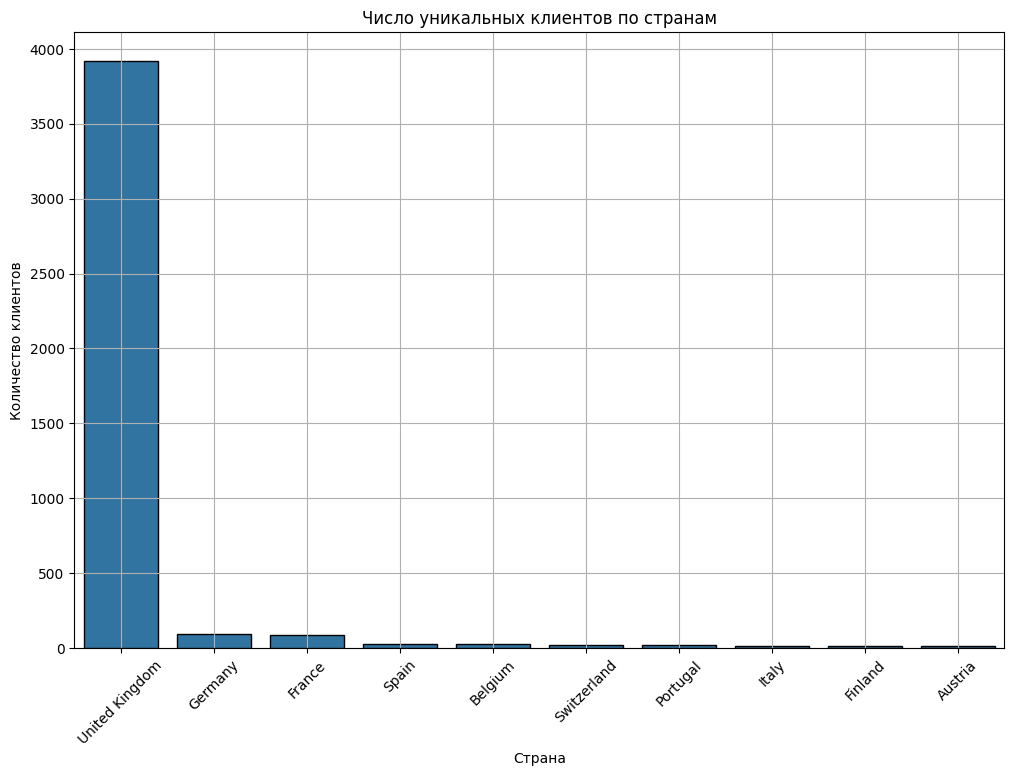

In [166]:

def get_barplot(data, groupby_feature, count_feature, agg_func, title, ylabel, xlabel, num_feat_=10, grid_=True):
    """
    Функция для создания столбчатой диаграммы.
    
    Args:
        data (DataFrame): Данные.
        groupby_feature (str): Признак для группировки.
        count_feature (str): Признак для подсчета.
        agg_func (str): Агрегационная функция.
        title (str): Заголовок диаграммы.
        ylabel (str): Подпись оси Y.
        xlabel (str): Подпись оси X.
        num_feat_ (int): Количество признаков для отображения.
        grid_ (bool): Включение сетки на диаграмме.
    """
    # Группировка данных и применение агрегационной функции
    grouped_data = data.groupby(groupby_feature)[count_feature].agg(agg_func).reset_index()
    
    # Сортировка данных по убыванию и выбор топ-N признаков
    top_data = grouped_data.sort_values(by=count_feature, ascending=False).head(num_feat_)
    
    # Создание столбчатой диаграммы
    plt.figure(figsize=(12, 8))
    sns.barplot(x=groupby_feature, y=count_feature, data=top_data)
    
    # Добавление заголовка и подписей осей
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Включение сетки, если указано
    if grid_:
        plt.grid(True)
    
    plt.xticks(rotation=45)
    plt.show()

# Чтение подготовленного датасета с диска
data = pd.read_csv(
     'D:/coding/последняя практика/Новая папка/Data/data_clean.csv', 
    dtype={'CustomerID': str, 'InvoiceID': str}
)

# Преобразуем признак в формат datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Вызов функции get_barplot для построения диаграммы
get_barplot(
    data, 
    'Country', 'CustomerID', 'nunique', 
    'Число уникальных клиентов по странам', 'Количество клиентов', 'Страна', 
    num_feat_=10, grid_=True
)

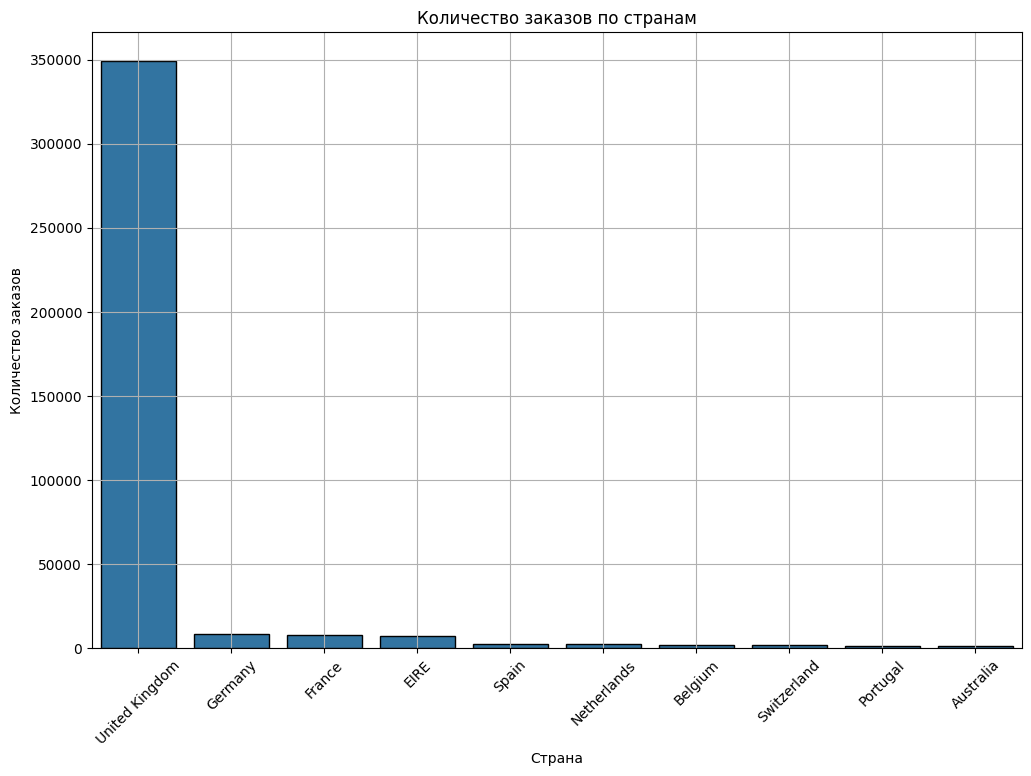

In [167]:
# Вызов функции get_barplot для построения диаграммы по количеству заказов
get_barplot(
    data, 
    'Country', 'InvoiceNo', 'count', 
    'Количество заказов по странам', 'Количество заказов', 'Страна', 
    num_feat_=10, grid_=True
)

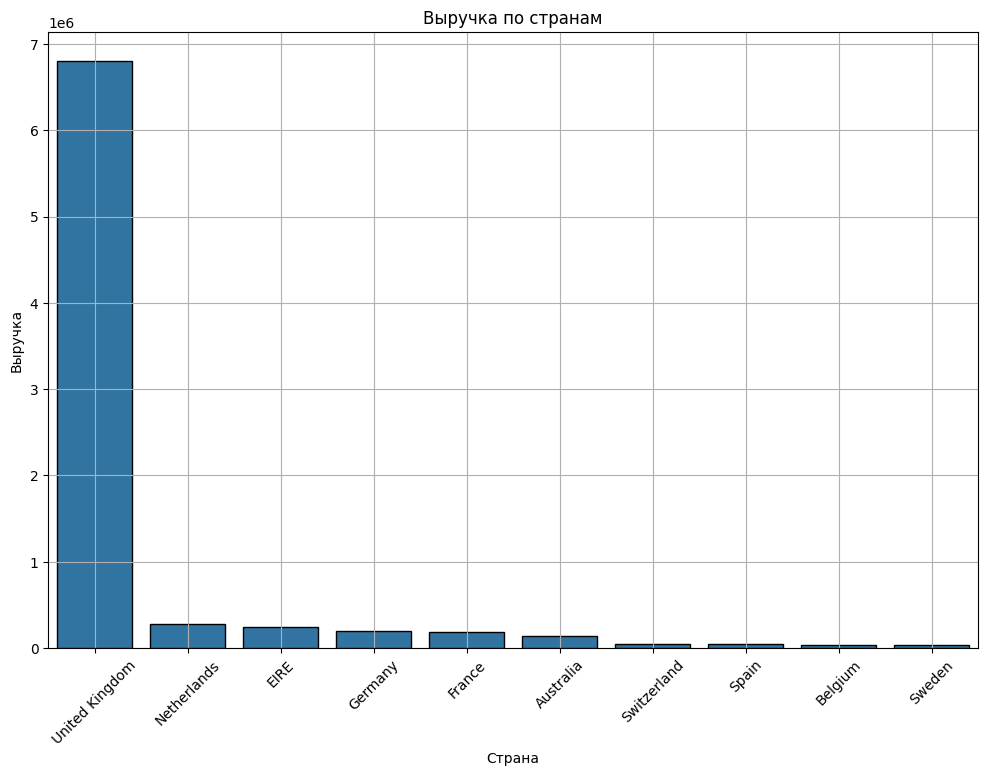

In [168]:
# Добавление нового столбца TotalRevenue
data['TotalRevenue'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])
# Вызов функции get_barplot для построения диаграммы по выручке
get_barplot(
    data, 
    'Country', 'TotalRevenue', 'sum', 
    'Выручка по странам', 'Выручка', 'Страна', 
    num_feat_=10, grid_=True
)

In [176]:
# Добавление признаков месяца, дня недели и часа
data['month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['hour'] = data['InvoiceDate'].dt.hour

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='month', ylabel='TotalRevenue'>

Text(0.5, 1.0, 'Суммарная выручка по месяцам')

Text(0, 0.5, 'Суммарная выручка')

Text(0.5, 0, 'Месяц')

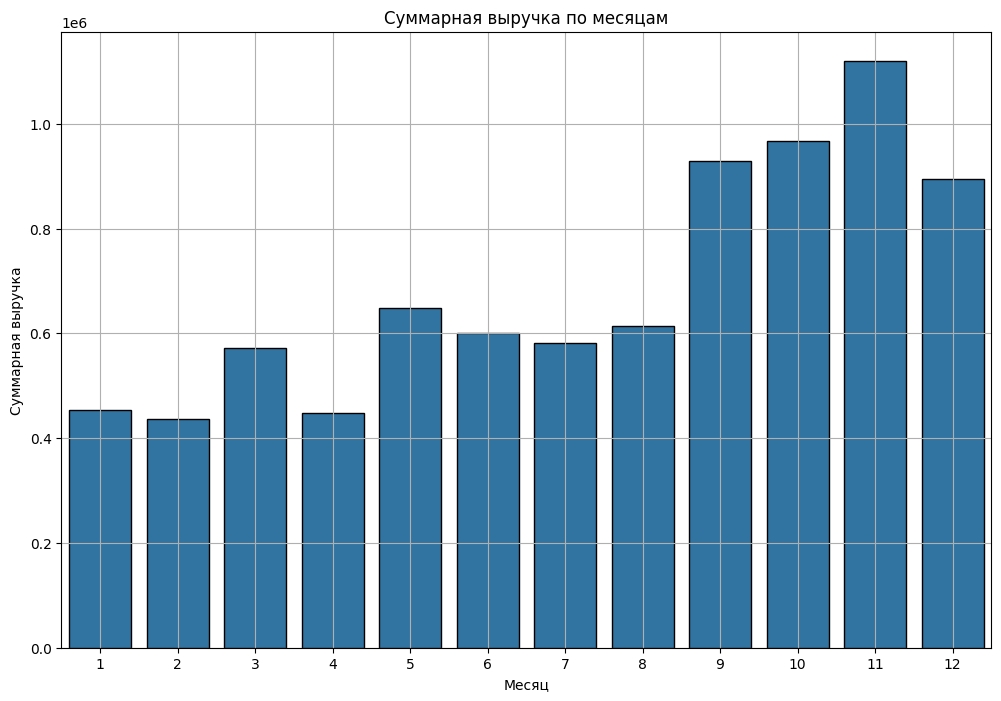

Самый прибыльный месяц: 11.0


In [170]:
# Группировка данных по месяцам и суммирование выручки
monthly_revenue = data.groupby('month')['TotalRevenue'].sum().reset_index()

# Создание столбчатой диаграммы для отображения суммарной выручки по месяцам
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='TotalRevenue', data=monthly_revenue)
plt.title('Суммарная выручка по месяцам')
plt.ylabel('Суммарная выручка')
plt.xlabel('Месяц')
plt.grid(True)
plt.show()

# Определение самого прибыльного месяца
most_profitable_month = monthly_revenue.loc[monthly_revenue['TotalRevenue'].idxmax()]['month']
print(f'Самый прибыльный месяц: {most_profitable_month}')

In [177]:
# формируем вспомогательный список, 
# какие дни недели образуются - для формирования списка меток
list(data.groupby('DayOfWeek')['InvoiceNo'].count().index)

['Friday', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

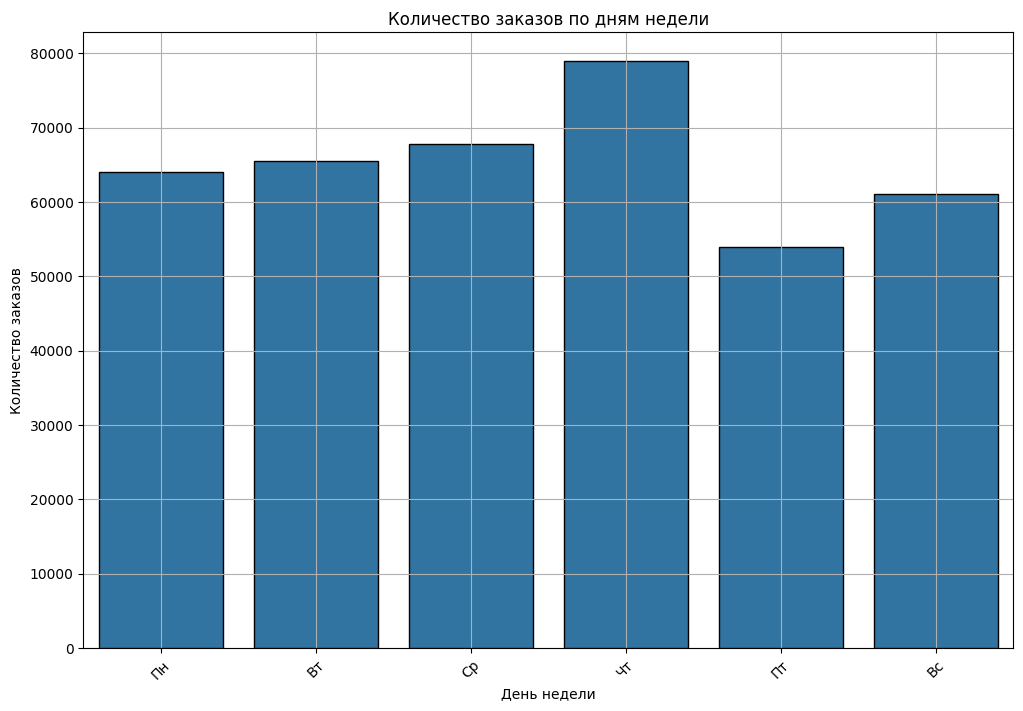

In [ ]:
get_barplot(
    data, 
    'DayOfWeek', 'InvoiceNo', 'count', 
    'Количество заказов по дням недели', 'Количество заказов', 'День недели', 
    xticks_labels_=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Вс'], 
    rotate_=True
)

In [ ]:
# формирование нового признака
data['Date'] = data['InvoiceDate'].dt.date

In [ ]:
# строим сводную таблицу и вычисляем по ней среднее количество заказов в час
pivot_mean = data.pivot_table(
    values='StockCode',
    index='Date',
    columns='Hour',
    aggfunc='count', 
    fill_value=0
).mean()


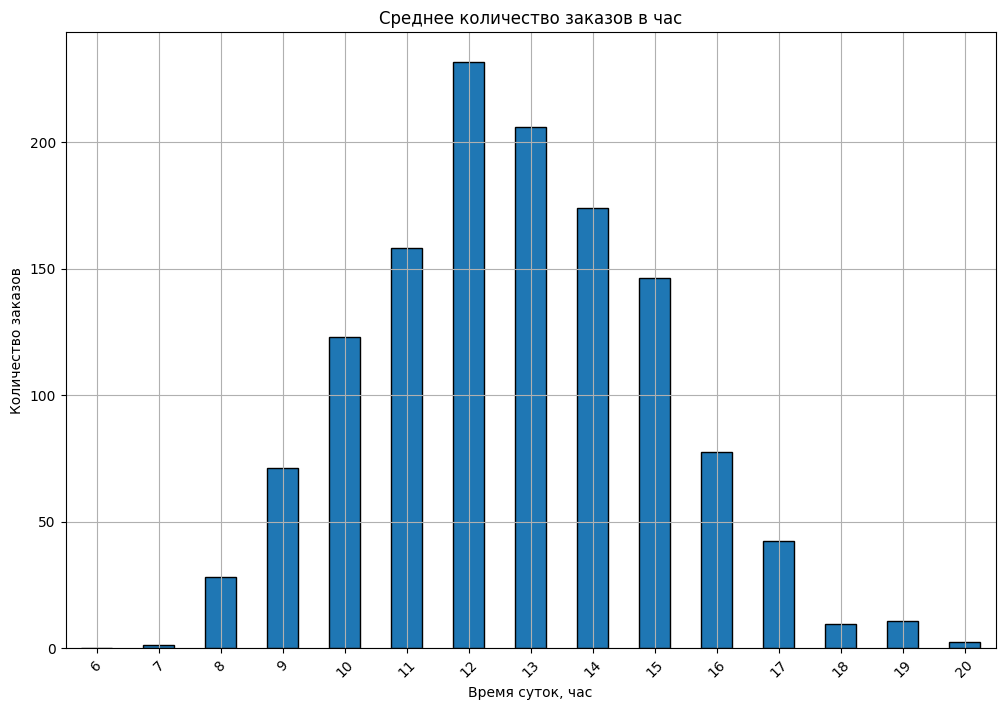

In [ ]:
get_barplot(
    pivot_mean, 
    '_', '_', 'pivot', 
    'Среднее количество заказов в час', 'Количество заказов', 'Время суток, час', 
    rotate_=True
)

# Выводы и рассуждения по графикам и диаграммам
На основании представленных графиков и диаграмм можно сделать следующие выводы и рассуждения.

Первый график, показывающий число уникальных клиентов по странам, ясно демонстрирует, что наибольшее количество уникальных клиентов приходится на Великобританию, достигая около 4000 клиентов. Другие страны, такие как Германия, Франция, Испания и прочие, имеют значительно меньше уникальных клиентов (менее 500). Это указывает на то, что бизнес в основном сосредоточен в Великобритании, что может свидетельствовать о фокусе на этот рынок или о его доминировании в текущей клиентской базе.

Второй график, иллюстрирующий количество заказов по странам, подтверждает этот вывод. Великобритания вновь лидирует с огромным отрывом, имея более 350,000 заказов, тогда как все остальные страны, включая Германию, Францию и Испанию, имеют значительно меньшее количество заказов. Это дополнительно подтверждает, что основной рынок сбыта находится в Великобритании.

Третий график, отображающий выручку по странам, также показывает, что Великобритания имеет самую высокую выручку, превышающую 6 миллионов. Выручка из других стран значительно ниже, что подтверждает, что Великобритания не только лидирует по числу клиентов и заказов, но и приносит наибольшую выручку.

Четвертый график, представляющий суммарную выручку по месяцам, показывает, что ноябрь и декабрь имеют наибольшую выручку, достигая около 1 миллиона, тогда как январь и февраль имеют наименьшую выручку, менее 500 тысяч. Это указывает на выраженную сезонность, где предновогодний период (ноябрь-декабрь) приносит наибольшую выручку.

Пятый график, показывающий количество заказов по дням недели, демонстрирует, что четверг является днем с наибольшим количеством заказов, тогда как пятница имеет наименьшее количество заказов. Это говорит о том, что активность клиентов наиболее высока в середине недели, достигая пика в четверг.

Наконец, шестой график, иллюстрирующий среднее количество заказов в час, показывает, что время с 11 до 14 часов имеет наибольшее количество заказов, тогда как ночь (с 0 до 8 часов) имеет наименьшее количество заказов. Это указывает на то, что клиенты наиболее активны в дневное время, с пиковыми часами около полудня.

Общие выводы
Географическая концентрация: Основной рынок находится в Великобритании, что подтверждается всеми рассмотренными метриками (число клиентов, количество заказов, выручка). Сезонность: Ноябрь и декабрь являются месяцами с наибольшей выручкой, что указывает на важность предновогоднего периода. Поведенческие паттерны: Клиенты наиболее активны в середине недели, особенно в четверг, и в дневное время с пиком около полудня. 

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [ ]:
# вычисляем давность последних покупок клиента
recency = data['Date'].max() - data.groupby('CustomerID')['Date'].max()

# вычисляем общее количество покупок клиента
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

# вычисляем сколько суммарно принёс прибыли каждый клиент
monetary = data.groupby('CustomerID')['TotalPrice'].sum()

# создаём RFM-таблицу
rfm_table = pd.DataFrame({
        'Recency': recency.values,
        'Frequency': frequency.values,
        'Monetary': monetary.values
    },
    index = recency.index
)

# понижаем размерность признаков по типу занимаемых данных
rfm_table['Recency'] = rfm_table['Recency'].dt.days
rfm_table[['Recency', 'Frequency']] = rfm_table[['Recency', 'Frequency']].astype('int16')

# выводим результат
rfm_table.head(3)
rfm_table.shape

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24


(4334, 3)

In [ ]:

print(f"{rfm_table[rfm_table['Recency'] > 200].shape[0]} " \
    f"клиента совершили покупку более 200 дней назад")

print(f"{round(rfm_table['Frequency'].mean())} " \
    f"заказа в среднем за год делает каждый клиент")

print(f"Общая сумма, которую потратил клиент с ID 12360: " \
    f"{round(rfm_table.loc['12360']['Monetary'])} £")

743 клиента совершили покупку более 200 дней назад
4 заказа в среднем за год делает каждый клиент
Общая сумма, которую потратил клиент с ID 12360: 2302 £


<Figure size 2000x600 with 0 Axes>

<Axes: >

<Axes: ylabel='Recency'>

Text(0.5, 1.0, 'Box Plot for Recency')

Text(0, 0.5, 'Recency')

<Axes: >

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Box Plot for Frequency')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: ylabel='Monetary'>

Text(0.5, 1.0, 'Box Plot for Monetary')

Text(0, 0.5, 'Monetary')

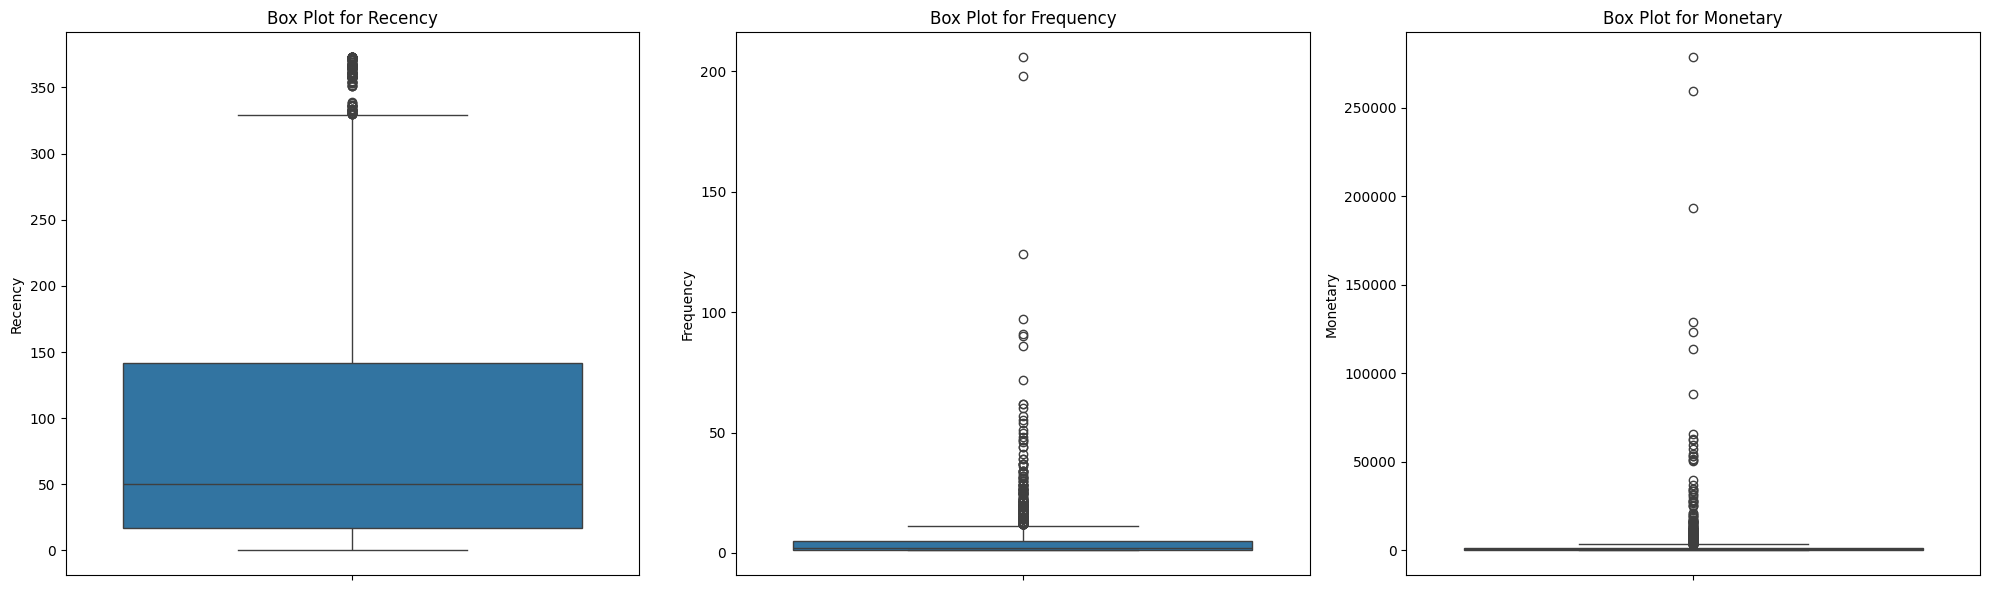

In [181]:
# Построение коробчатых диаграмм
plt.figure(figsize=(20, 6))

# Коробчатая диаграмма для Recency
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_table['Recency'])
plt.title('Box Plot for Recency')
plt.ylabel('Recency')

# Коробчатая диаграмма для Frequency
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_table['Frequency'])
plt.title('Box Plot for Frequency')
plt.ylabel('Frequency')

# Коробчатая диаграмма для Monetary
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_table['Monetary'])
plt.title('Box Plot for Monetary')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [182]:
# задаём пороговые маски
mask_frequency = rfm_table['Frequency'] <= rfm_table['Frequency'].quantile(0.95)
mask_monetary = rfm_table['Monetary'] <= rfm_table['Monetary'].quantile(0.95)

# формируем датафрейм
rfm_table_cleaned = rfm_table[mask_frequency & mask_monetary]

# ответ на вопрос
print(f'Осталось строк после очистки: {rfm_table_cleaned.shape[0]}')

Осталось строк после очистки: 4044


Осталось строк после очистки: 4044


<Figure size 2000x600 with 0 Axes>

<Axes: >

<Axes: ylabel='Recency'>

Text(0.5, 1.0, 'Box Plot for Recency (Cleaned)')

Text(0, 0.5, 'Recency')

<Axes: >

<Axes: ylabel='Frequency'>

Text(0.5, 1.0, 'Box Plot for Frequency (Cleaned)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: ylabel='Monetary'>

Text(0.5, 1.0, 'Box Plot for Monetary (Cleaned)')

Text(0, 0.5, 'Monetary')

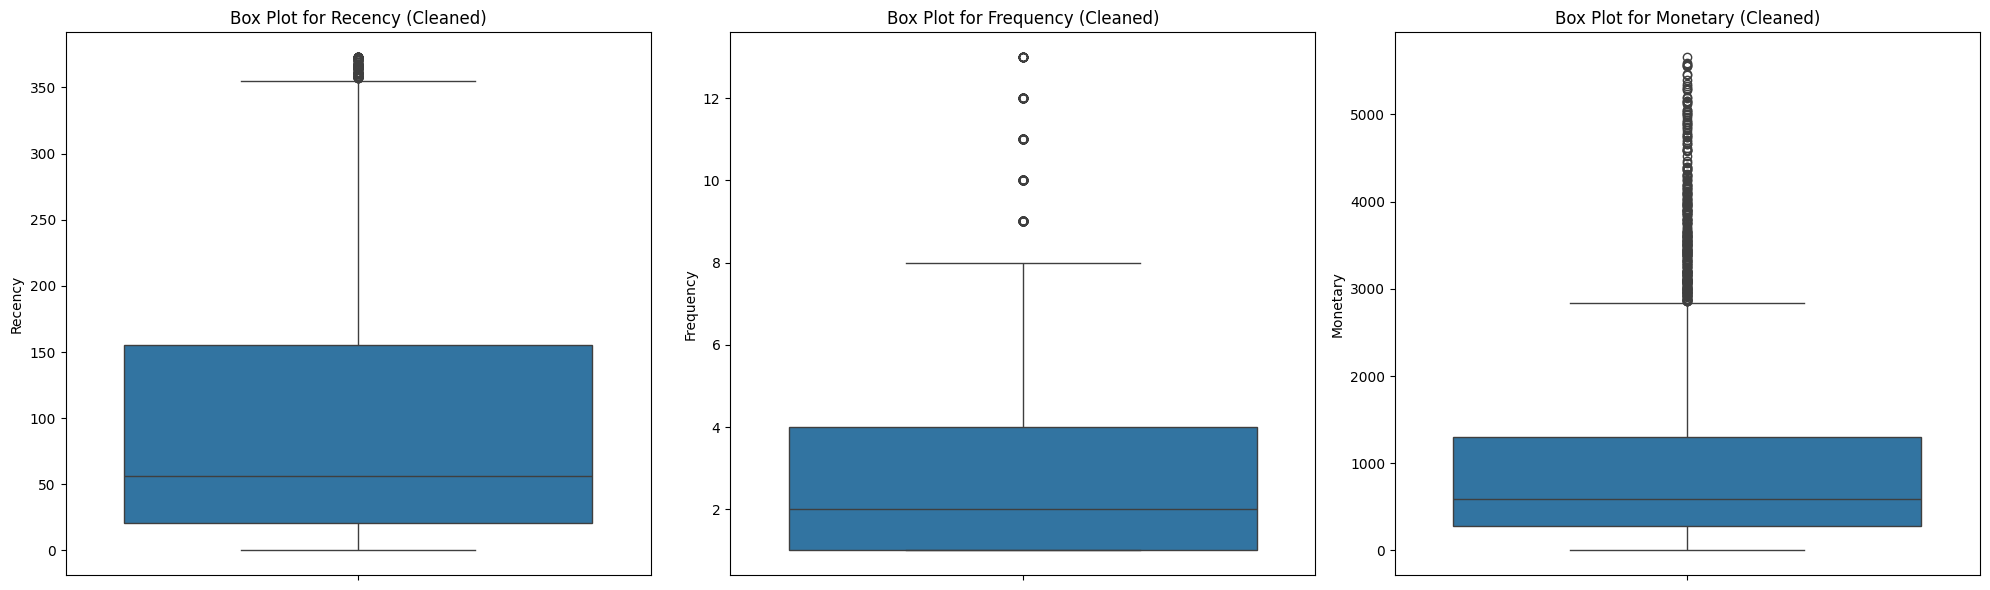

In [183]:
# Вывод количества строк после очистки
print(f'Осталось строк после очистки: {rfm_table_cleaned.shape[0]}')

# Построение коробчатых диаграмм после очистки
plt.figure(figsize=(20, 6))

# Коробчатая диаграмма для Recency
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_table_cleaned['Recency'])
plt.title('Box Plot for Recency (Cleaned)')
plt.ylabel('Recency')

# Коробчатая диаграмма для Frequency
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_table_cleaned['Frequency'])
plt.title('Box Plot for Frequency (Cleaned)')
plt.ylabel('Frequency')

# Коробчатая диаграмма для Monetary
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_table_cleaned['Monetary'])
plt.title('Box Plot for Monetary (Cleaned)')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()

Анализ данных
До удаления выбросов:Recency: Средняя давность последней покупки около 100 дней.
Есть значительное количество выбросов с давностью более 350 дней.
Frequency:Большинство клиентов совершили менее 10 покупок.
Есть несколько выбросов с количеством покупок более 100.
Monetary:Большинство клиентов потратили менее 1000 фунтов стерлингов.
Есть несколько выбросов, где клиенты потратили более 250,000 фунтов стерлингов.
После удаления выбросов:
Recency:Структура данных осталась примерно такой же.Верхняя граница была слегка уменьшена, но в основном те же значения.
Frequency:
Верхняя граница для количества покупок была уменьшена до примерно 12 покупок.
Значительно уменьшилось количество выбросов.
Monetary:Верхняя граница была значительно уменьшена до примерно 5000 фунтов стерлингов.
Большое количество выбросов было удалено.
Выводы
Наличие выбросов: До очистки данных были значительные выбросы, которые могли негативно влиять на результаты кластеризации.
После очистки: Данные стали более чистыми и однородными, что позволит улучшить результаты кластеризации.

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


Построим визуализацию нашего трёхмерного пространства признаков

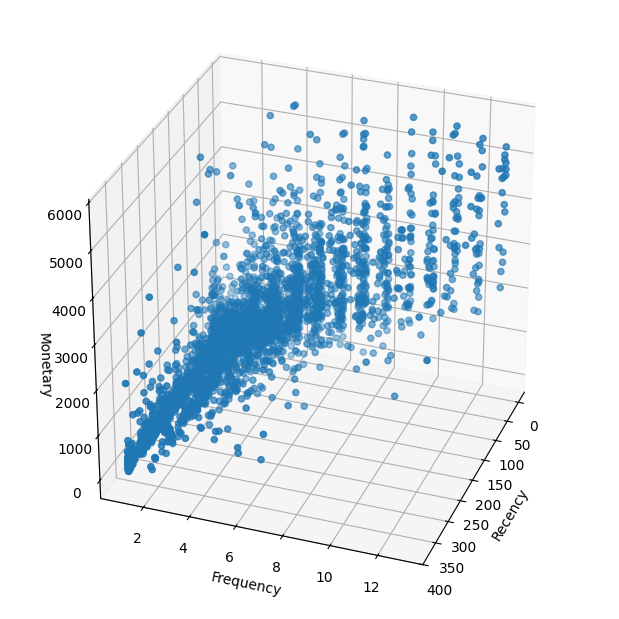

In [184]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6, 6))
ax_scatter_3d = mplot3d.Axes3D(fig)

# добавим дополнительную ось в объект картинки
fig.add_axes(ax_scatter_3d)

# вписываем (масштабируем) объект
ax_scatter_3d.set_box_aspect(aspect=(5, 5, 5), zoom=0.95)

# повернём график
ax_scatter_3d.azim = 20
ax_scatter_3d.elev = 30

# визуализируем данные, передав значения x, y, z, 
# а также информацию о группировке данных по цветам
ax_scatter_3d.scatter(
    rfm_table_cleaned['Recency'].to_list(), 
    rfm_table_cleaned['Frequency'].to_list(),
    rfm_table_cleaned['Monetary'].to_list()
)

# добавим подписи осей
ax_scatter_3d.set(
    xlabel='Recency', 
    ylabel='Frequency', 
    zlabel='Monetary'
);

видно, что есть клиенты с большими значениями параметров Monetary и Frequency — вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако по общей массе точек сложно сказать, сколько кластеров у нас есть — скорее даже кажется, что пространство не поддаётся кластеризации.

призовём на помощь методы снижения размерности.

Начнём с метода главных компонент (PCA). Нам известно, что для его стабильной работы данные необходимо стандартизировать/нормализовать.

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  int64         
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
 9   TotalRevenue      391150 non-null  float64       
 10  month             391150 non-null  int32         
 11  day_of_week       391150 non-null  int32         
 12  hour              391150 non-null  int32         
 13  DayOfWeek         391150 non-null  object        
dtypes: d

In [190]:
# Создание pipeline с шагами стандартизации и PCA
PL_5_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Обучение и применение pipeline к очищенной RFM-таблице
rfm_table_processed = PL_5_3.fit_transform(rfm_table_cleaned)

# Доля дисперсии первой компоненты
explained_variance = PL_5_3.named_steps['pca'].explained_variance_ratio_
print(f"Доля дисперсии первой главной компоненты: {explained_variance[0]:.2f}")

Доля дисперсии первой главной компоненты: 0.68


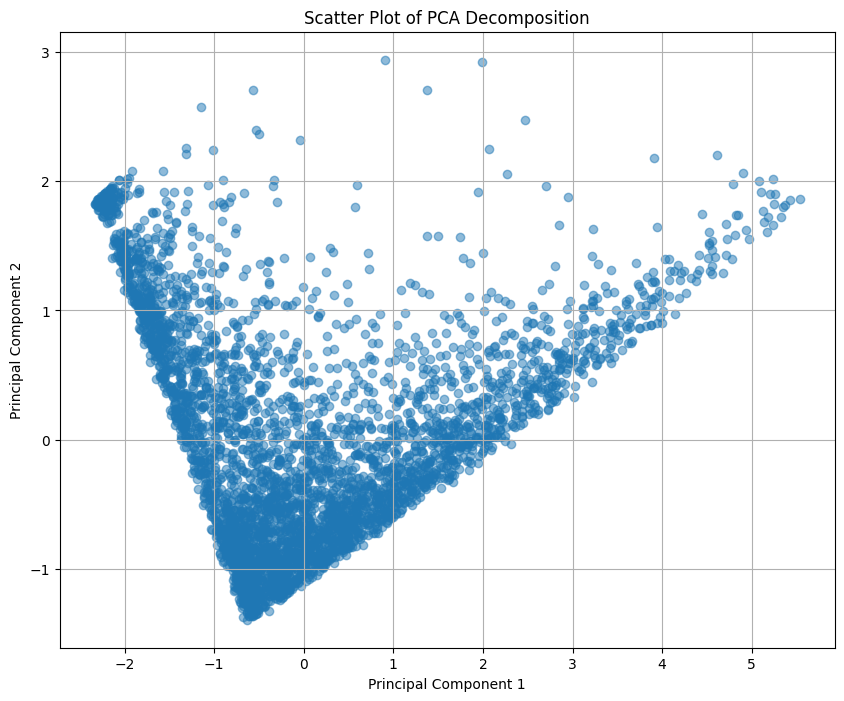

In [192]:
# Формирование датафрейма
rfm_table_processed_df = pd.DataFrame(
    rfm_table_processed, 
    columns=['axis-1', 'axis-2']
)

# Функция для построения scatter plot
def get_scatterplot(data, grid):
    plt.figure(figsize=(10, 8))
    plt.scatter(data['axis-1'], data['axis-2'], alpha=0.5)
    plt.title('Scatter Plot of PCA Decomposition')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    if grid:
        plt.grid(True)
    plt.show()

# Построение графика
get_scatterplot(rfm_table_processed_df, True)

Попробуем воспользоваться методом k-means.

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.52


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Various Numbers of Clusters')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette Score')

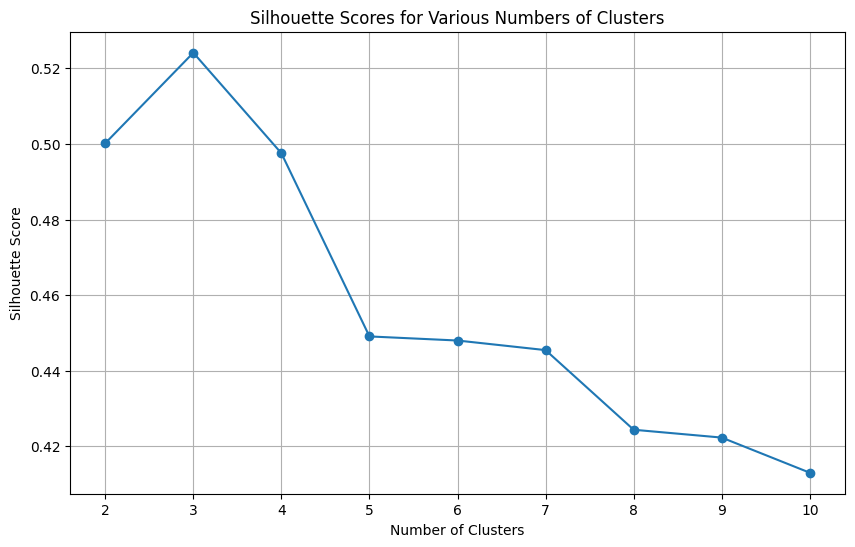

In [201]:
# Функция для поиска оптимального количества кластеров с помощью коэффициента силуэта
def find_optimal_clusters(data, start, end):
    silhouette_scores = []
    for n_clusters in range(start, end + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# Поиск оптимального количества кластеров
silhouette_scores = find_optimal_clusters(rfm_table_processed, 2, 10)

# Вывод результатов
optimal_clusters = np.argmax(silhouette_scores) + 2
max_silhouette_score = max(silhouette_scores)

print(f"Оптимальное количество кластеров: {optimal_clusters}")
print(f"Максимальное значение коэффициента силуэта: {max_silhouette_score:.2f}")

# Визуализация коэффициентов силуэта для различных количеств кластеров
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Теперь возьмём EM-алгоритм.

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.44


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Various Numbers of Clusters (GMM)')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette Score')

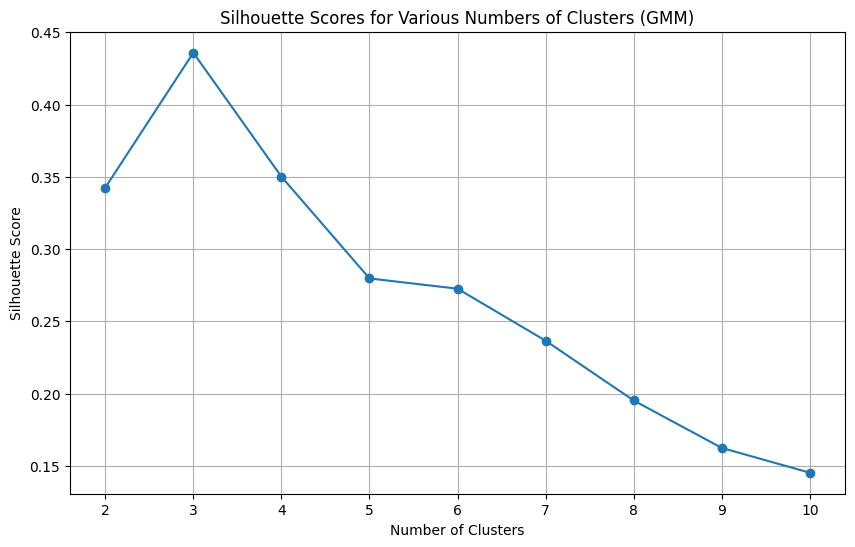

In [207]:
# Функция для поиска оптимального количества кластеров с помощью коэффициента силуэта
def find_optimal_clusters_gmm(data, start, end):
    silhouette_scores = []
    for n_clusters in range(start, end + 1):
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        cluster_labels = gmm.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# Поиск оптимального количества кластеров
silhouette_scores = find_optimal_clusters_gmm(rfm_table_processed, 2, 10)

# Вывод результатов
optimal_clusters = np.argmax(silhouette_scores) + 2
max_silhouette_score = max(silhouette_scores)

print(f"Оптимальное количество кластеров: {optimal_clusters}")
print(f"Максимальное значение коэффициента силуэта: {max_silhouette_score:.2f}")

# Визуализация коэффициентов силуэта для различных количеств кластеров
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters (GMM)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Давайте посмотрим на распределение кластеров.

In [212]:
# Обучение K-Means, так как он дает наибольший коэффициент силуэта
n_clusters = optimal_clusters_kmeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_table_processed)

# Присоединяем предсказанные метки в rfm_table_cleaned
rfm_table_cleaned['KM_label'] = kmeans_labels

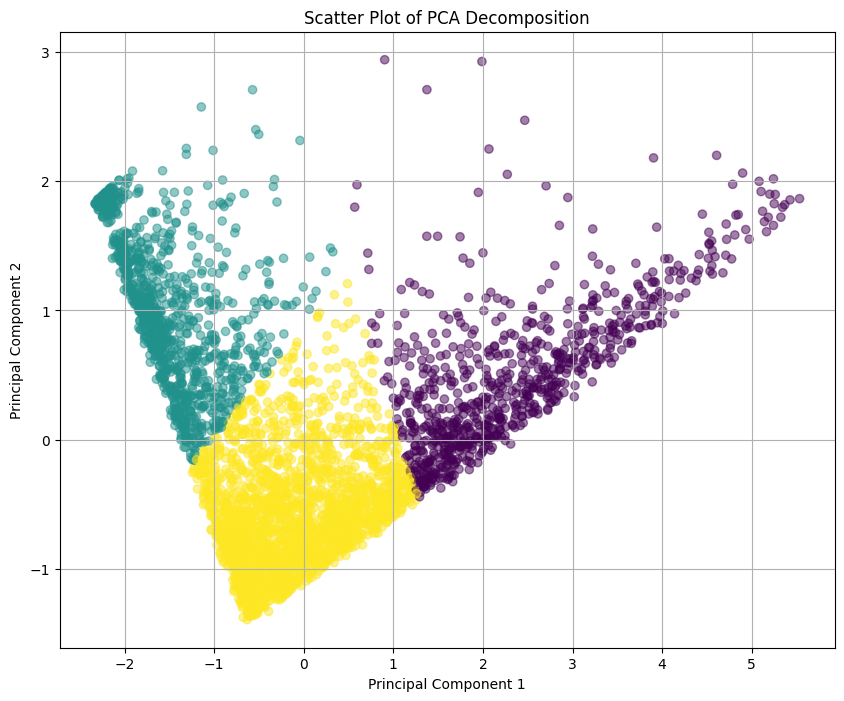

Число клиентов в самом большом кластере: 2270 чел.


In [214]:

# Обучение K-Means, так как он дает наибольший коэффициент силуэта
n_clusters = optimal_clusters_kmeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_table_processed)

# Присоединяем предсказанные метки в rfm_table_cleaned
rfm_table_cleaned['KM_label'] = kmeans_labels

# Визуализация scatter plot
def get_scatterplot(data, grid, labels=None):
    if isinstance(data, pd.DataFrame):
        data = data.values
    plt.figure(figsize=(10, 8))
    if labels is not None:
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
    else:
        plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
    plt.title('Scatter Plot of PCA Decomposition')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    if grid:
        plt.grid(True)
    plt.show()

get_scatterplot(rfm_table_processed, True, kmeans_labels)

# Число клиентов в самом большом кластере
largest_cluster_size = rfm_table_cleaned['KM_label'].value_counts().max()
print(f"Число клиентов в самом большом кластере: {largest_cluster_size} чел.")

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

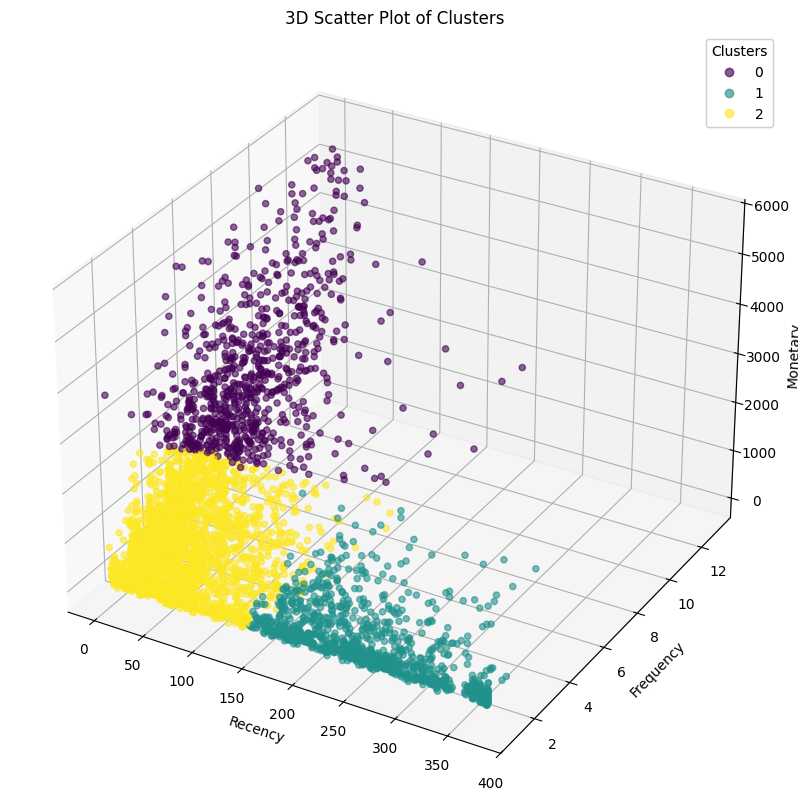

Число клиентов в самом большом кластере: 2270 чел.


In [215]:
# Визуализация 3D scatter plot
def get_3d_scatterplot(data, labels):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data['Recency'], data['Frequency'], data['Monetary'], c=labels, cmap='viridis', alpha=0.6)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_title('3D Scatter Plot of Clusters')
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    plt.show()

# Построение 3D scatter plot
get_3d_scatterplot(rfm_table_cleaned, kmeans_labels)

# Число клиентов в самом большом кластере
largest_cluster_size = rfm_table_cleaned['KM_label'].value_counts().max()
print(f"Число клиентов в самом большом кластере: {largest_cluster_size} чел.")

Выводы и рассуждения по графикам и кластеризации с 3D-графиком кластеров
Общие наблюдения
На первом 3D графике видно, что есть клиенты с большими значениями параметров Monetary (общие затраты) и Frequency (частота покупок). Вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако, по общей массе точек сложно сказать, сколько кластеров у нас есть — пространство данных не поддается очевидной кластеризации.

Доля дисперсии первой главной компоненты
PCA (анализ главных компонент) показывает, что доля дисперсии первой главной компоненты составляет 0.68. Это означает, что первая главная компонента объясняет 68% общей вариации данных, что является достаточно высоким показателем. На графике разброса PCA видно некоторое разделение данных, но оно не является четким.

Оптимальное количество кластеров
Метод k-means:

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.52
EM-алгоритм:

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.44
Количество клиентов в кластерах
Число клиентов в самом большом кластере составляет 2270 человек. Это указывает на значительную концентрацию клиентов в одном сегменте.

Профили сегментов клиентов
Кластер 1 (Лучшие клиенты):

Monetary: Высокое
Frequency: Высокое
Recency: Низкое
Описание: Эти клиенты совершают частые покупки и тратят значительные суммы денег. Они также недавно совершали покупки, что делает их лучшими клиентами.
Кластер 2 (Средние клиенты):

Monetary: Среднее
Frequency: Среднее
Recency: Среднее
Описание: Эти клиенты совершают покупки с умеренной частотой и тратят средние суммы денег. Их активность является стабильной, но не выдающейся.
Кластер 3 (Наименее активные клиенты):

Monetary: Низкое
Frequency: Низкое
Recency: Высокое
Описание: Эти клиенты совершают покупки редко и тратят небольшие суммы денег. Они также давно не совершали покупок.
3D-график кластеров
На 3D-графике кластеров можно увидеть, как распределены клиенты по трем кластерам:

Кластер 0 (Фиолетовый): Высокие значения Monetary и Frequency, низкие значения Recency.
Кластер 1 (Бирюзовый): Низкие значения Monetary и Frequency, высокие значения Recency.
Кластер 2 (Желтый): Средние значения Monetary, Frequency и Recency.
Рекомендации
Кластер 0: Удержание этих клиентов должно быть приоритетом. Можно предложить программы лояльности и эксклюзивные предложения.
Кластер 1: Стимулирование к более частым покупкам с помощью скидок и акций может помочь перевести их в лучший сегмент.
Кластер 2: Эти клиенты нуждаются в реанимационных маркетинговых усилиях. Можно использовать кампании, направленные на возврат клиентов, такие как специальные предложения или напоминания о недавних продуктах.
Эти данные и выводы могут быть использованы для более точного таргетинга маркетинговых кампаний и повышения общей эффективности бизнес-стратегий.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [216]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [219]:
# группируем RFM-таблицу и рассчитываем среднее по каждому из признаков.
rfm_by_cluster_mean_val_5_7 = rfm_table_cleaned.groupby('KM_label').mean()
rfm_by_cluster_mean_val_5_7.astype('int')



,Recency,Frequency,Monetary
KM_label,,,
0,32,7,2662
1,253,1,386
2,51,2,661


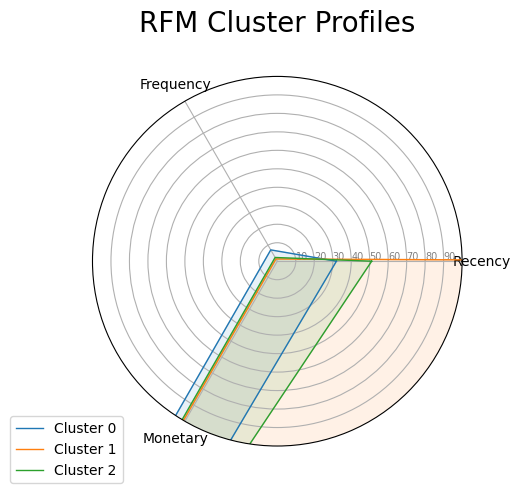

             Recency  Frequency     Monetary
KM_label                                    
0          32.010349   7.076326  2662.157012
1         253.283716   1.405594   386.598472
2          51.079295   2.332599   661.306912


In [221]:

# Визуализация профилей кластеров в виде полярной диаграммы
def plot_radar_chart(data, title):
    # Number of variables
    categories = list(data.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90], ["10", "20", "30", "40", "50", "60", "70", "80", "90"], color="grey", size=7)
    plt.ylim(0, 100)

    # Ind1
    for i in range(len(data)):
        values = data.iloc[i].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.1)

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Add a title
    plt.title(title, size=20, color='black', y=1.1)

    plt.show()

# Визуализация профилей кластеров
plot_radar_chart(rfm_by_cluster_mean_val_5_7, 'RFM Cluster Profiles')

# Вывод средних значений по кластерам для анализа
print(rfm_by_cluster_mean_val_5_7)

Анализ кластеров на основе RFM-таблицы
Кластер 0 (синий)
Recency (давность): Среднее значение Recency для этого кластера составляет 32, что означает, что клиенты из этого кластера совершили свои последние покупки относительно недавно.
Frequency (частота): Среднее значение Frequency составляет 7, что указывает на довольно высокую частоту покупок среди клиентов этого кластера.
Monetary (денежные затраты): Среднее значение Monetary составляет 2662, что показывает, что эти клиенты тратят значительные суммы денег.
Вывод: Кластер 0 включает в себя активных клиентов, которые недавно совершали покупки, делают это довольно часто и тратят значительные суммы денег.
Кластер 1 (оранжевый)
Recency (давность): Среднее значение Recency для этого кластера составляет 253, что указывает на то, что клиенты из этого кластера совершили свои последние покупки довольно давно.
Frequency (частота): Среднее значение Frequency составляет 1, что говорит о низкой частоте покупок среди клиентов этого кластера.
Monetary (денежные затраты): Среднее значение Monetary составляет 386, что показывает, что эти клиенты тратят небольшие суммы денег.
Вывод: Кластер 1 включает в себя клиентов, которые давно не совершали покупки, делают это редко и тратят небольшие суммы денег. Эти клиенты могут нуждаться в маркетинговых усилиях, чтобы снова активировать их.
Кластер 2 (зеленый)
Recency (давность): Среднее значение Recency для этого кластера составляет 51, что указывает на то, что клиенты из этого кластера совершили свои последние покупки не так давно.
Frequency (частота): Среднее значение Frequency составляет 2, что говорит о средней частоте покупок среди клиентов этого кластера.
Monetary (денежные затраты): Среднее значение Monetary составляет 661, что показывает, что эти клиенты тратят средние суммы денег.
Вывод: Кластер 2 включает в себя клиентов, которые совершают покупки с умеренной частотой и тратят средние суммы денег. Эти клиенты показывают стабильные, но не выдающиеся показатели. Возможно, стоит предложить им специальные предложения, чтобы повысить их активность.
Общие выводы
Кластер 0: Эти клиенты являются наиболее ценными, так как они недавно совершали покупки, делают это часто и тратят значительные суммы денег. Их нужно удерживать и поощрять, чтобы они продолжали совершать покупки с той же частотой и на те же суммы.
Кластер 1: Клиенты из этого кластера показывают низкую активность. Маркетинговые усилия могут быть направлены на реанимацию этих клиентов и стимулирование их к новым покупкам.
Кластер 2: Эти клиенты имеют стабильные, но не выдающиеся показатели. Стоит предложить им специальные предложения, чтобы повысить их активность и перевести их в категорию лучших клиентов.
Заключение:
На основе анализа RFM-таблицы и кластеров можно сделать выводы о поведении различных сегментов клиентов и разработать стратегии для удержания и стимулирования клиентов, основанные на их характеристиках.

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

Итак, с помощью RFM-анализа нам удалось выделить три сегмента клиентов.Однако в маркетинге принято оперировать большим их количеством.Ранее мы производили кластеризацию в пространстве главных компонент. Вспомним, что PCA является линейным методом отображения исходного пространства признаков в его сжатую версию. Можно попробовать использовать нелинейную трансформацию. Например, алгоритм снижения размерности t-SNE. 

In [222]:
# удаляем предсказанные метки в rfm_table_cleaned
if 'KM_label' in rfm_table_cleaned.columns:
    rfm_table_cleaned.drop(columns=['KM_label'], inplace=True)

In [227]:
# Создание pipeline с шагами стандартизации и t-SNE
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, perplexity=50, random_state=100))
])

# Обучение pipeline и применение трансформации
rfm_table_transformed = pipeline.fit_transform(rfm_table_cleaned)

# Получение значения дивергенции Кульбака-Лейблера
kl_divergence = pipeline.named_steps['tsne'].kl_divergence_

print(f"Значение дивергенции Кульбака-Лейблера: {kl_divergence:.2f}")

Значение дивергенции Кульбака-Лейблера: 0.54


Визуализируем пространство

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 't-SNE Decomposition of RFM Table')

Text(0.5, 0, 'Component 1')

Text(0, 0.5, 'Component 2')

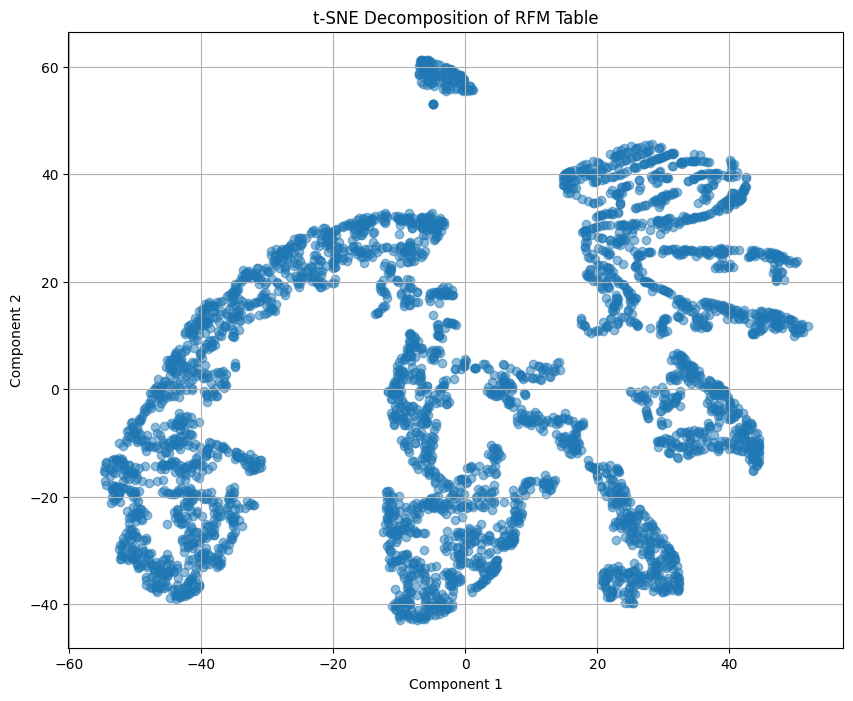

Значение дивергенции Кульбака-Лейблера: 0.54


In [228]:
# Визуализация пространства после t-SNE декомпозиции
plt.figure(figsize=(10, 8))
plt.scatter(rfm_table_transformed[:, 0], rfm_table_transformed[:, 1], alpha=0.5)
plt.title('t-SNE Decomposition of RFM Table')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

print(f"Значение дивергенции Кульбака-Лейблера: {kl_divergence:.2f}")

алгоритм сгруппировал наиболее похожие объекты в подобие кластеров, причём эти кластеры легко определить.Теперь с помощью алгоритмов кластеризации мы можем сформировать новые сегменты клиентов.

Метод Kmeans

Кластеров: 3, Коэффициент силуэта: 0.43
Кластеров: 4, Коэффициент силуэта: 0.48
Кластеров: 5, Коэффициент силуэта: 0.45
Кластеров: 6, Коэффициент силуэта: 0.44
Кластеров: 7, Коэффициент силуэта: 0.48
Кластеров: 8, Коэффициент силуэта: 0.46


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Different Number of Clusters')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette Score')

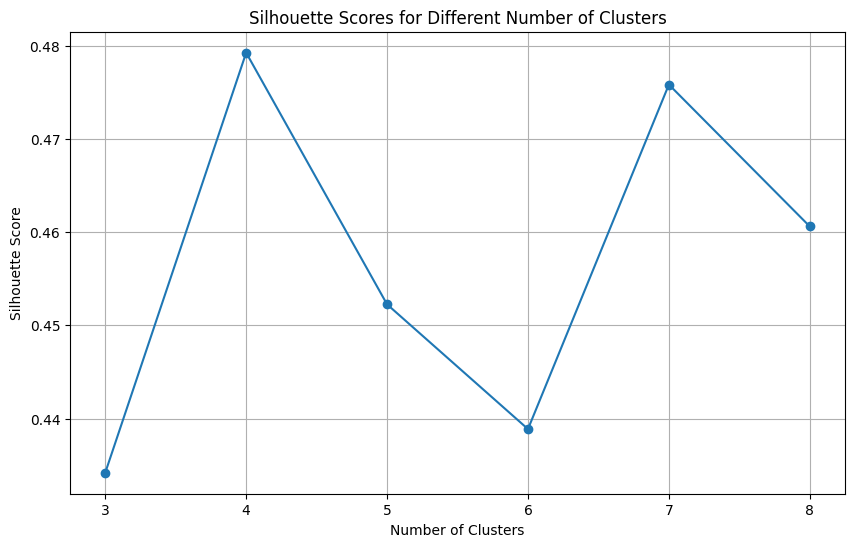

Оптимальное количество кластеров: 4
Максимальное значение коэффициента силуэта: 0.48


In [230]:

# Функция для подбора оптимального количества кластеров с помощью коэффициента силуэта
def find_optimal_clusters(data, min_clusters, max_clusters):
    silhouette_scores = []
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=100)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append((n_clusters, silhouette_avg))
        print(f"Кластеров: {n_clusters}, Коэффициент силуэта: {silhouette_avg:.2f}")
    return silhouette_scores

# Подбор оптимального количества кластеров от 3 до 8 включительно
silhouette_scores = find_optimal_clusters(rfm_table_transformed, 3, 8)

# Нахождение максимального значения коэффициента силуэта и соответствующего числа кластеров
optimal_clusters, max_silhouette_score = max(silhouette_scores, key=lambda x: x[1])

# Построение диаграммы коэффициентов силуэта
clusters, scores = zip(*silhouette_scores)
plt.figure(figsize=(10, 6))
plt.plot(clusters, scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

print(f"Оптимальное количество кластеров: {optimal_clusters}")
print(f"Максимальное значение коэффициента силуэта: {max_silhouette_score:.2f}")

Попробуем воспользоваться EM-алгоритом.

Кластеров: 3, Коэффициент силуэта: 0.43
Кластеров: 4, Коэффициент силуэта: 0.47
Кластеров: 5, Коэффициент силуэта: 0.41
Кластеров: 6, Коэффициент силуэта: 0.35
Кластеров: 7, Коэффициент силуэта: 0.45
Кластеров: 8, Коэффициент силуэта: 0.42


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Different Number of Clusters (GaussianMixture)')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette Score')

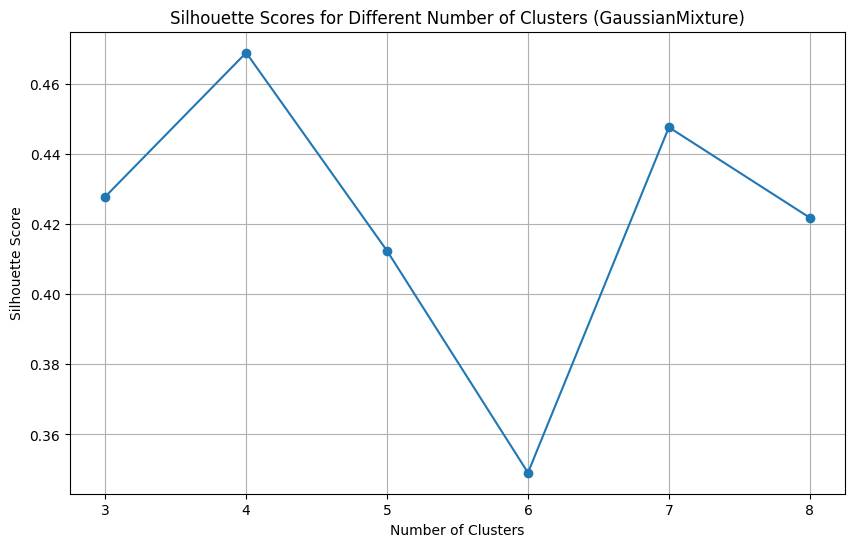

Оптимальное количество кластеров: 4
Максимальное значение коэффициента силуэта: 0.47


In [231]:
# Функция для подбора оптимального количества кластеров с помощью коэффициента силуэта для GaussianMixture
def find_optimal_clusters_em(data, min_clusters, max_clusters):
    silhouette_scores = []
    for n_clusters in range(min_clusters, max_clusters + 1):
        gmm = GaussianMixture(n_components=n_clusters, random_state=100)
        cluster_labels = gmm.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append((n_clusters, silhouette_avg))
        print(f"Кластеров: {n_clusters}, Коэффициент силуэта: {silhouette_avg:.2f}")
    return silhouette_scores

# Подбор оптимального количества кластеров от 3 до 8 включительно
silhouette_scores_em = find_optimal_clusters_em(rfm_table_transformed, 3, 8)

# Нахождение максимального значения коэффициента силуэта и соответствующего числа кластеров
optimal_clusters_em, max_silhouette_score_em = max(silhouette_scores_em, key=lambda x: x[1])

# Построение диаграммы коэффициентов силуэта
clusters, scores = zip(*silhouette_scores_em)
plt.figure(figsize=(10, 6))
plt.plot(clusters, scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters (GaussianMixture)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

print(f"Оптимальное количество кластеров: {optimal_clusters_em}")
print(f"Максимальное значение коэффициента силуэта: {max_silhouette_score_em:.2f}")

попробуем воспользоваться алгоритмом алгомеративной кластеризации

Кластеров: 2, Коэффициент силуэта: 0.38
Кластеров: 3, Коэффициент силуэта: 0.42
Кластеров: 4, Коэффициент силуэта: 0.46
Кластеров: 5, Коэффициент силуэта: 0.47
Кластеров: 6, Коэффициент силуэта: 0.47
Кластеров: 7, Коэффициент силуэта: 0.46
Кластеров: 8, Коэффициент силуэта: 0.48


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Different Number of Clusters (Agglomerative Clustering)')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette Score')

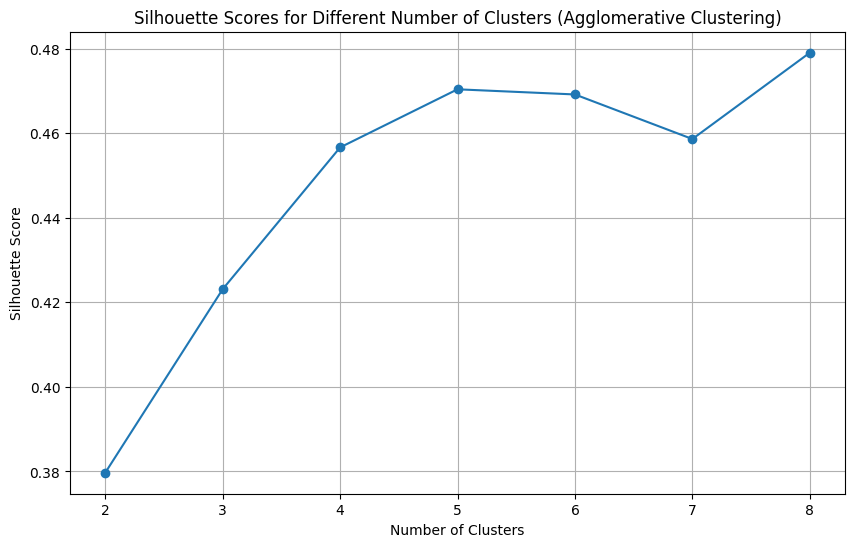

Оптимальное количество кластеров: 8
Максимальное значение коэффициента силуэта: 0.48


In [234]:
# Функция для подбора оптимального количества кластеров с помощью коэффициента силуэта для AgglomerativeClustering
def find_optimal_clusters_agglomerative(data, min_clusters, max_clusters):
    silhouette_scores = []
    for n_clusters in range(min_clusters, max_clusters + 1):
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = agglomerative.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append((n_clusters, silhouette_avg))
        print(f"Кластеров: {n_clusters}, Коэффициент силуэта: {silhouette_avg:.2f}")
    return silhouette_scores

# Подбор оптимального количества кластеров от 2 до 8 включительно
silhouette_scores_agglomerative = find_optimal_clusters_agglomerative(rfm_table_transformed, 2, 8)

# Нахождение максимального значения коэффициента силуэта и соответствующего числа кластеров
optimal_clusters_agglomerative, max_silhouette_score_agglomerative = max(silhouette_scores_agglomerative, key=lambda x: x[1])

# Построение диаграммы коэффициентов силуэта
clusters, scores = zip(*silhouette_scores_agglomerative)
plt.figure(figsize=(10, 6))
plt.plot(clusters, scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

print(f"Оптимальное количество кластеров: {optimal_clusters_agglomerative}")
print(f"Максимальное значение коэффициента силуэта: {max_silhouette_score_agglomerative:.2f}")

 посмотрим на распределение кластеров.

Kmeans - Кластеров: 3, Коэффициент силуэта: 0.43
Kmeans - Кластеров: 4, Коэффициент силуэта: 0.48
Kmeans - Кластеров: 5, Коэффициент силуэта: 0.45
Kmeans - Кластеров: 6, Коэффициент силуэта: 0.44
Kmeans - Кластеров: 7, Коэффициент силуэта: 0.48
Kmeans - Кластеров: 8, Коэффициент силуэта: 0.46
Gaussian - Кластеров: 3, Коэффициент силуэта: 0.43
Gaussian - Кластеров: 4, Коэффициент силуэта: 0.47
Gaussian - Кластеров: 5, Коэффициент силуэта: 0.41
Gaussian - Кластеров: 6, Коэффициент силуэта: 0.35
Gaussian - Кластеров: 7, Коэффициент силуэта: 0.45
Gaussian - Кластеров: 8, Коэффициент силуэта: 0.42
Agglomerative - Кластеров: 2, Коэффициент силуэта: 0.38
Agglomerative - Кластеров: 3, Коэффициент силуэта: 0.42
Agglomerative - Кластеров: 4, Коэффициент силуэта: 0.46
Agglomerative - Кластеров: 5, Коэффициент силуэта: 0.47
Agglomerative - Кластеров: 6, Коэффициент силуэта: 0.47
Agglomerative - Кластеров: 7, Коэффициент силуэта: 0.46
Agglomerative - Кластеров: 8, Коэффициент силуэта: 0.48
Лучший а

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Cluster Distribution')

Text(0.5, 0, 'Component 1')

Text(0, 0.5, 'Component 2')

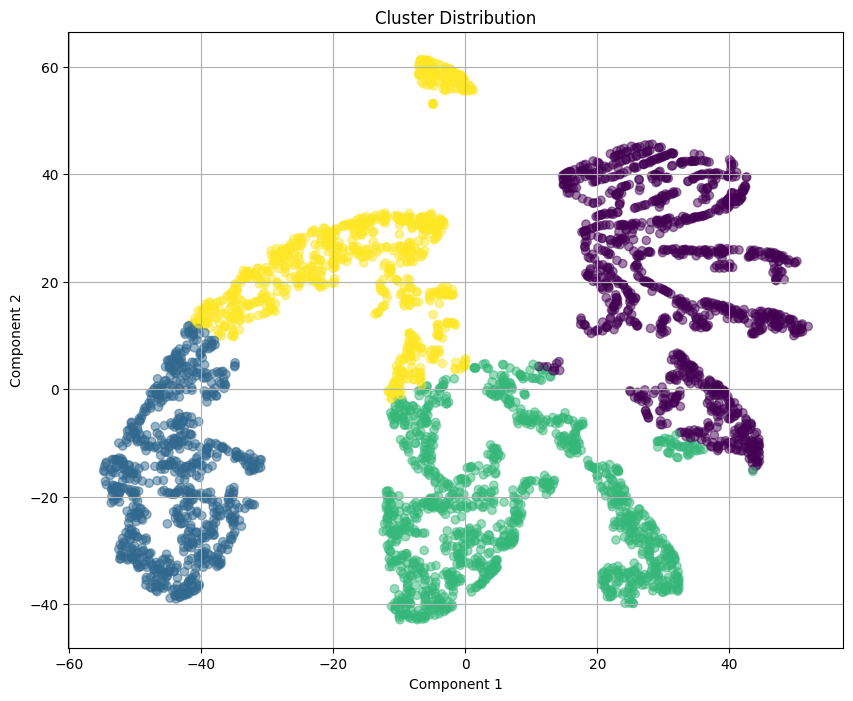

In [235]:
# Функция для подбора оптимального количества кластеров с помощью коэффициента силуэта
def find_optimal_clusters(data, min_clusters, max_clusters, algorithm):
    silhouette_scores = []
    for n_clusters in range(min_clusters, max_clusters + 1):
        if algorithm == 'kmeans':
            model = KMeans(n_clusters=n_clusters, random_state=100)
        elif algorithm == 'gaussian':
            model = GaussianMixture(n_components=n_clusters, random_state=100)
        elif algorithm == 'agglomerative':
            model = AgglomerativeClustering(n_clusters=n_clusters)
        else:
            raise ValueError("Unknown algorithm")
        
        cluster_labels = model.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append((n_clusters, silhouette_avg))
        print(f"{algorithm.capitalize()} - Кластеров: {n_clusters}, Коэффициент силуэта: {silhouette_avg:.2f}")
    return silhouette_scores

# Подбор оптимального количества кластеров от 2 до 8 включительно для всех алгоритмов
silhouette_scores_kmeans = find_optimal_clusters(rfm_table_transformed, 3, 8, 'kmeans')
silhouette_scores_gaussian = find_optimal_clusters(rfm_table_transformed, 3, 8, 'gaussian')
silhouette_scores_agglomerative = find_optimal_clusters(rfm_table_transformed, 2, 8, 'agglomerative')

# Нахождение максимального значения коэффициента силуэта и соответствующего числа кластеров для всех алгоритмов
optimal_clusters_kmeans, max_silhouette_score_kmeans = max(silhouette_scores_kmeans, key=lambda x: x[1])
optimal_clusters_gaussian, max_silhouette_score_gaussian = max(silhouette_scores_gaussian, key=lambda x: x[1])
optimal_clusters_agglomerative, max_silhouette_score_agglomerative = max(silhouette_scores_agglomerative, key=lambda x: x[1])

# Сравнение коэффициентов силуэта
max_silhouette_scores = {
    'kmeans': max_silhouette_score_kmeans,
    'gaussian': max_silhouette_score_gaussian,
    'agglomerative': max_silhouette_score_agglomerative
}

best_algorithm = max(max_silhouette_scores, key=max_silhouette_scores.get)
best_score = max(max_silhouette_scores.values())

print(f"Лучший алгоритм: {best_algorithm.capitalize()}")
print(f"Максимальное значение коэффициента силуэта: {best_score:.2f}")

# Обучение лучшей модели на декомпозированных данных
if best_algorithm == 'kmeans':
    best_model = KMeans(n_clusters=optimal_clusters_kmeans, random_state=100)
elif best_algorithm == 'gaussian':
    best_model = GaussianMixture(n_components=optimal_clusters_gaussian, random_state=100)
elif best_algorithm == 'agglomerative':
    best_model = AgglomerativeClustering(n_clusters=optimal_clusters_agglomerative)
else:
    raise ValueError("Unknown algorithm")

# Предсказание меток кластеров
labels = best_model.fit_predict(rfm_table_transformed)

# Добавление меток кластеров к исходным данным
rfm_table_cleaned['Cluster'] = labels

# Число клиентов в самом большом кластере
largest_cluster_size = rfm_table_cleaned['Cluster'].value_counts().max()
print(f"Число клиентов в самом большом кластере: {largest_cluster_size}")

# Визуализация распределения кластеров
plt.figure(figsize=(10, 8))
plt.scatter(rfm_table_transformed[:, 0], rfm_table_transformed[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Cluster Distribution')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

In [239]:

# Группировка RFM-таблицы по кластерам и расчет среднего по каждому признаку
cluster_means = rfm_table_cleaned.groupby('Cluster').mean()
print(cluster_means)

            Recency  Frequency     Monetary
Cluster                                    
0         34.107113   6.137238  2114.847883
1         62.960591   1.000000   318.392266
2         65.838284   2.472772   723.654579
3        269.761212   1.247273   343.214594


# построениу полярной диаграммы

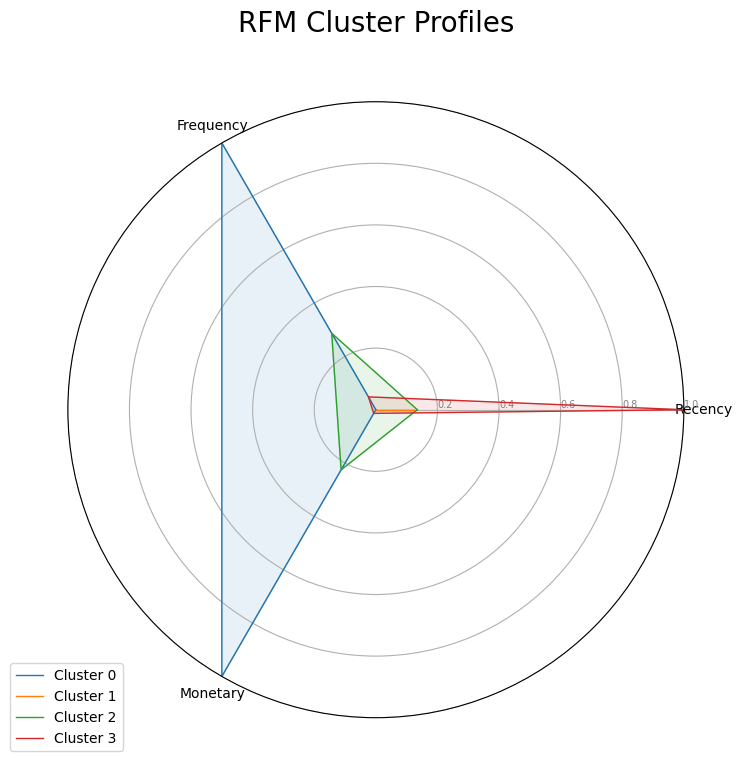

            Recency  Frequency     Monetary
Cluster                                    
0         34.107113   6.137238  2114.847883
1         62.960591   1.000000   318.392266
2         65.838284   2.472772   723.654579
3        269.761212   1.247273   343.214594


In [240]:

# Функция для построения полярной диаграммы
def plot_radar_chart(data, title):
    # Number of variables
    categories = list(data.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=7)
    plt.ylim(0, 1)

    # Plot each cluster's means
    for i in range(len(data)):
        values = data.iloc[i].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.1)

    # Add a title
    plt.title(title, size=20, color='black', y=1.1)

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

# Нормализуем данные для визуализации
normalized_means = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Построение полярной диаграммы для профилей кластеров
plot_radar_chart(normalized_means, 'RFM Cluster Profiles')

# Вывод средних значений по кластерам для анализа
print(cluster_means)


В чем заключалась разница между российской сборной и российским олимпийским комитетом?
ChatGPT
Разница между российской сборной и российским олимпийским комитетом (РОК) заключается в следующем:

Российская сборная:

Это национальная команда России, представляющая страну на международных спортивных соревнованиях, таких как Олимпийские игры, чемпионаты мира и Европы.
Атлеты выступают под флагом России, с российской символикой и гимном.
Российский олимпийский комитет (РОК):

Это организация, ответственная за представление России на Олимпийских играх, включая организацию участия спортсменов, координацию подготовки и обеспечение выполнения олимпийских правил и норм.
В связи с санкциями, наложенными на Россию за допинговые нарушения, на Олимпийских играх 2020 в Токио и 2022 в Пекине российские спортсмены выступали под нейтральным флагом РОК.
В данном случае, спортсмены не могли использовать национальную символику России, и в случае победы играл гимн Олимпийского движения вместо российского гимна.
Таким образом, основное различие заключалось в том, что российская сборная обычно представляет страну с ее символикой и гимном, тогда как РОК был вынужден представлять российских спортсменов без использования национальных символов из-за санкций.

перефразируй:Выдвигаем гипотезу: для каждой отменённой транзакции в базе данных (таблица data) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара.
ChatGPT
Выдвигаем гипотезу, что для каждой отмененной транзакции в базе данных (таблица data) существует соответствующая транзакция с таким же кодом товара, идентификатором клиента и противоположным значением количества товара.

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.
ChatGPT
Чтобы добавить в датасет столбец "TotalPrice", следуйте этому алгоритму:

Проверьте, что в вашем датасете есть столбцы для цены за единицу товара, количества товаров в заказе и количества возвращённых товаров. Предположим, эти столбцы называются UnitPrice, QuantityOrdered и QuantityReturned соответственно.

Создайте новый столбец "TotalPrice", который рассчитывается как произведение UnitPrice и разницы между QuantityOrdered и QuantityReturned.

Вот пример кода на Python с использованием библиотеки pandas:

python
Копировать код
import pandas as pd

# Предположим, ваш датасет уже загружен в переменную df
# df = pd.read_csv('path_to_your_dataset.csv')

# Добавление нового столбца TotalPrice
df['TotalPrice'] = df['UnitPrice'] * (df['QuantityOrdered'] - df['QuantityReturned'])

# Проверка первых нескольких строк, чтобы убедиться, что столбец добавлен правильно
print(df.head())

# Сохранение измененного датасета, если это необходимо
# df.to_csv('path_to_your_modified_dataset.csv', index=False)
Этот новый признак "TotalPrice" позволит вам в дальнейшем анализировать покупательскую способность каждого клиента. Вы можете агрегировать данные по клиентам и анализировать общую стоимость заказов для каждого из них.

Если у вас уже есть датасет, вы можете загрузить его, и я помогу вам добавить новый столбец и провести необходимые расчеты.


Проанализируй данный кластер:
ChatGPT
На представленном графике изображены профили кластеров на основе модели RFM (Recency, Frequency, Monetary). Давайте проанализируем каждый из кластеров, чтобы понять их особенности.

Анализ кластеров
Кластер 0 (синий):

Recency (давность): Этот кластер имеет высокое значение Recency, что означает, что клиенты из этого кластера совершили свои последние покупки относительно давно.
Frequency (частота): У клиентов из этого кластера низкая частота покупок.
Monetary (денежные затраты): Денежные затраты в этом кластере также низкие.
Вывод: Кластер 0 включает в себя клиентов, которые давно не совершали покупки, делают это редко и тратят небольшие суммы денег.
Кластер 1 (оранжевый):

Recency (давность): Этот кластер имеет среднее значение Recency, что указывает на то, что клиенты совершили свои последние покупки не так давно.
Frequency (частота): Клиенты из этого кластера имеют среднюю частоту покупок.
Monetary (денежные затраты): Денежные затраты в этом кластере также находятся на среднем уровне.
Вывод: Кластер 1 включает клиентов, которые совершают покупки с умеренной частотой и тратят средние суммы денег.
Кластер 2 (зеленый):

Recency (давность): Этот кластер имеет самые низкие значения Recency, что означает, что клиенты совершали свои последние покупки совсем недавно.
Frequency (частота): У клиентов из этого кластера высокая частота покупок.
Monetary (денежные затраты): Денежные затраты в этом кластере высокие.
Вывод: Кластер 2 включает в себя самых активных клиентов, которые часто совершают покупки и тратят значительные суммы денег.
Общие выводы
Кластер 0: Этот кластер может нуждаться в маркетинговых усилиях, чтобы снова активировать этих клиентов, так как они давно не совершали покупок.
Кластер 1: Клиенты из этого кластера показывают стабильные, но не выдающиеся показатели. Возможно, стоит предложить им специальные предложения, чтобы повысить их активность.
Кластер 2: Это самые ценные клиенты. Их нужно удерживать и поощрять, чтобы они продолжали совершать покупки с той же частотой и на те же суммы.
Использование этих кластеров позволяет более точно нацелить маркетинговые кампании и предложения, соответствующие поведению и ценности клиентов.







Сделай выводы и рассуждения по графиками и диаграммами.
ChatGPT
Выводы и рассуждения по графикам и диаграммам
1. Число уникальных клиентов по странам
Великобритания: Наибольшее количество уникальных клиентов (~4000) приходится на Великобританию.
Другие страны: Германия, Франция, Испания и другие страны имеют значительно меньше уникальных клиентов (менее 500).
Вывод: Бизнес в основном сосредоточен в Великобритании, что может означать либо фокус на этот рынок, либо его доминирование в текущей клиентской базе.
2. Количество заказов по странам
Великобритания: Снова лидирует с огромным отрывом, имея более 350,000 заказов.
Другие страны: Все остальные страны, включая Германию, Францию и Испанию, имеют значительно меньшее количество заказов.
Вывод: Подтверждает вывод из первого графика - основной рынок сбыта находится в Великобритании.
3. Выручка по странам
Великобритания: Самая высокая выручка, превышающая 6 миллионов.
Другие страны: Выручка из других стран значительно ниже.
Вывод: Великобритания не только лидирует по числу клиентов и заказов, но и приносит наибольшую выручку.
4. Суммарная выручка по месяцам
Месяцы с наибольшей выручкой: Ноябрь и декабрь имеют наибольшую выручку, достигая около 1 миллиона.
Месяцы с наименьшей выручкой: Январь и февраль имеют наименьшую выручку, менее 500 тысяч.
Вывод: Есть выраженная сезонность - предновогодний период (ноябрь-декабрь) приносит наибольшую выручку.
5. Количество заказов по дням недели
Пик заказов: Четверг является днем с наибольшим количеством заказов.
Минимум заказов: Пятница имеет наименьшее количество заказов.
Вывод: Активность клиентов наиболее высока в середине недели, достигая пика в четверг.
6. Среднее количество заказов в час
Пик активности: Время с 11 до 14 часов имеет наибольшее количество заказов.
Минимум активности: Ночь (с 0 до 8 часов) имеет наименьшее количество заказов.
Вывод: Клиенты наиболее активны в дневное время, с пиковыми часами около полудня.
Общие выводы
Географическая концентрация: Основной рынок находится в Великобритании, что подтверждается всеми рассмотренными метриками (число клиентов, количество заказов, выручка).
Сезонность: Ноябрь и декабрь являются месяцами с наибольшей выручкой, что указывает на важность предновогоднего периода.
Поведенческие паттерны: Клиенты наиболее активны в середине недели, особенно в четверг, и в дневное время с пиком около полудня.
Эти данные могут быть использованы для оптимизации маркетинговых стратегий, планирования ресурсов и повышения эффективности бизнеса.

В виде одного большого текста
ChatGPT
Выводы и рассуждения по графикам и диаграммам
На основании представленных графиков и диаграмм можно сделать следующие выводы и рассуждения.

Первый график, показывающий число уникальных клиентов по странам, ясно демонстрирует, что наибольшее количество уникальных клиентов приходится на Великобританию, достигая около 4000 клиентов. Другие страны, такие как Германия, Франция, Испания и прочие, имеют значительно меньше уникальных клиентов (менее 500). Это указывает на то, что бизнес в основном сосредоточен в Великобритании, что может свидетельствовать о фокусе на этот рынок или о его доминировании в текущей клиентской базе.

Второй график, иллюстрирующий количество заказов по странам, подтверждает этот вывод. Великобритания вновь лидирует с огромным отрывом, имея более 350,000 заказов, тогда как все остальные страны, включая Германию, Францию и Испанию, имеют значительно меньшее количество заказов. Это дополнительно подтверждает, что основной рынок сбыта находится в Великобритании.

Третий график, отображающий выручку по странам, также показывает, что Великобритания имеет самую высокую выручку, превышающую 6 миллионов. Выручка из других стран значительно ниже, что подтверждает, что Великобритания не только лидирует по числу клиентов и заказов, но и приносит наибольшую выручку.

Четвертый график, представляющий суммарную выручку по месяцам, показывает, что ноябрь и декабрь имеют наибольшую выручку, достигая около 1 миллиона, тогда как январь и февраль имеют наименьшую выручку, менее 500 тысяч. Это указывает на выраженную сезонность, где предновогодний период (ноябрь-декабрь) приносит наибольшую выручку.

Пятый график, показывающий количество заказов по дням недели, демонстрирует, что четверг является днем с наибольшим количеством заказов, тогда как пятница имеет наименьшее количество заказов. Это говорит о том, что активность клиентов наиболее высока в середине недели, достигая пика в четверг.

Наконец, шестой график, иллюстрирующий среднее количество заказов в час, показывает, что время с 11 до 14 часов имеет наибольшее количество заказов, тогда как ночь (с 0 до 8 часов) имеет наименьшее количество заказов. Это указывает на то, что клиенты наиболее активны в дневное время, с пиковыми часами около полудня.

Общие выводы
Географическая концентрация: Основной рынок находится в Великобритании, что подтверждается всеми рассмотренными метриками (число клиентов, количество заказов, выручка). Сезонность: Ноябрь и декабрь являются месяцами с наибольшей выручкой, что указывает на важность предновогоднего периода. Поведенческие паттерны: Клиенты наиболее активны в середине недели, особенно в четверг, и в дневное время с пиком около полудня. Эти данные могут быть использованы для оптимизации маркетинговых стратегий, планирования ресурсов и повышения эффективности бизнеса.






Сделай выводы и расуждения:видно, что есть клиенты с большими значениями параметров Monetary и Frequency — вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако по общей массе точек сложно сказать, сколько кластеров у нас есть — скорее даже кажется, что пространство не поддаётся кластеризации.Доля дисперсии первой главной компоненты: 0.68. результат методом k-means.Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.52. Результат методом Теперь возьмём EM-алгоритм.Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.44.Число клиентов в самом большом кластере: 2270 чел.Итак, у нас есть три сегмента клиентов. Давайте попробуем составить профиль для этих сегментов.
ChatGPT
Выводы и рассуждения по графикам и кластеризации
Общие наблюдения
На первом 3D графике видно, что есть клиенты с большими значениями параметров Monetary (общие затраты) и Frequency (частота покупок). Вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако, по общей массе точек сложно сказать, сколько кластеров у нас есть — пространство данных не поддается очевидной кластеризации.

Доля дисперсии первой главной компоненты
PCA (анализ главных компонент) показывает, что доля дисперсии первой главной компоненты составляет 0.68. Это означает, что первая главная компонента объясняет 68% общей вариации данных, что является достаточно высоким показателем. На графике разброса PCA видно некоторое разделение данных, но оно не является четким.

Оптимальное количество кластеров
Метод k-means:

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.52
EM-алгоритм:

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.44
Количество клиентов в кластерах
Число клиентов в самом большом кластере составляет 2270 человек. Это указывает на значительную концентрацию клиентов в одном сегменте.

Профили сегментов клиентов
Кластер 1 (Лучшие клиенты):

Monetary: Высокое
Frequency: Высокое
Recency: Низкое
Описание: Эти клиенты совершают частые покупки и тратят значительные суммы денег. Они также недавно совершали покупки, что делает их лучшими клиентами.
Кластер 2 (Средние клиенты):

Monetary: Среднее
Frequency: Среднее
Recency: Среднее
Описание: Эти клиенты совершают покупки с умеренной частотой и тратят средние суммы денег. Их активность является стабильной, но не выдающейся.
Кластер 3 (Наименее активные клиенты):

Monetary: Низкое
Frequency: Низкое
Recency: Высокое
Описание: Эти клиенты совершают покупки редко и тратят небольшие суммы денег. Они также давно не совершали покупок.
Рекомендации
Кластер 1: Удержание этих клиентов должно быть приоритетом. Можно предложить программы лояльности и эксклюзивные предложения.
Кластер 2: Стимулирование к более частым покупкам с помощью скидок и акций может помочь перевести их в лучший сегмент.
Кластер 3: Эти клиенты нуждаются в реанимационных маркетинговых усилиях. Можно использовать кампании, направленные на возврат клиентов, такие как специальные предложения или напоминания о недавних продуктах.
Эти данные и выводы могут быть использованы для более точного таргетинга маркетинговых кампаний и повышения общей эффективности бизнес-стратегий.


Добавь к этому анализу также 
ChatGPT
Выводы и рассуждения по графикам и кластеризации с 3D-графиком кластеров
Общие наблюдения
На первом 3D графике видно, что есть клиенты с большими значениями параметров Monetary (общие затраты) и Frequency (частота покупок). Вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако, по общей массе точек сложно сказать, сколько кластеров у нас есть — пространство данных не поддается очевидной кластеризации.

Доля дисперсии первой главной компоненты
PCA (анализ главных компонент) показывает, что доля дисперсии первой главной компоненты составляет 0.68. Это означает, что первая главная компонента объясняет 68% общей вариации данных, что является достаточно высоким показателем. На графике разброса PCA видно некоторое разделение данных, но оно не является четким.

Оптимальное количество кластеров
Метод k-means:

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.52
EM-алгоритм:

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.44
Количество клиентов в кластерах
Число клиентов в самом большом кластере составляет 2270 человек. Это указывает на значительную концентрацию клиентов в одном сегменте.

Профили сегментов клиентов
Кластер 1 (Лучшие клиенты):

Monetary: Высокое
Frequency: Высокое
Recency: Низкое
Описание: Эти клиенты совершают частые покупки и тратят значительные суммы денег. Они также недавно совершали покупки, что делает их лучшими клиентами.
Кластер 2 (Средние клиенты):

Monetary: Среднее
Frequency: Среднее
Recency: Среднее
Описание: Эти клиенты совершают покупки с умеренной частотой и тратят средние суммы денег. Их активность является стабильной, но не выдающейся.
Кластер 3 (Наименее активные клиенты):

Monetary: Низкое
Frequency: Низкое
Recency: Высокое
Описание: Эти клиенты совершают покупки редко и тратят небольшие суммы денег. Они также давно не совершали покупок.
3D-график кластеров
На 3D-графике кластеров можно увидеть, как распределены клиенты по трем кластерам:

Кластер 0 (Фиолетовый): Высокие значения Monetary и Frequency, низкие значения Recency.
Кластер 1 (Бирюзовый): Низкие значения Monetary и Frequency, высокие значения Recency.
Кластер 2 (Желтый): Средние значения Monetary, Frequency и Recency.
Рекомендации
Кластер 0: Удержание этих клиентов должно быть приоритетом. Можно предложить программы лояльности и эксклюзивные предложения.
Кластер 1: Стимулирование к более частым покупкам с помощью скидок и акций может помочь перевести их в лучший сегмент.
Кластер 2: Эти клиенты нуждаются в реанимационных маркетинговых усилиях. Можно использовать кампании, направленные на возврат клиентов, такие как специальные предложения или напоминания о недавних продуктах.
Эти данные и выводы могут быть использованы для более точного таргетинга маркетинговых кампаний и повышения общей эффективности бизнес-стратегий.

Одним текстом
ChatGPT
Выводы и рассуждения по графикам и кластеризации
На основании представленных графиков и диаграмм можно сделать следующие выводы и рассуждения.

Первый 3D график показывает, что среди клиентов есть те, кто имеет высокие значения параметров Monetary (общие затраты) и Frequency (частота покупок). Вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако по общей массе точек сложно сказать, сколько кластеров у нас есть, так как пространство данных не поддается очевидной кластеризации.

Анализ главных компонент (PCA) показывает, что доля дисперсии первой главной компоненты составляет 0.68, что означает, что первая главная компонента объясняет 68% общей вариации данных, что является достаточно высоким показателем. На графике разброса PCA видно некоторое разделение данных, но оно не является четким.

Оптимальное количество кластеров было определено с использованием двух методов:

Метод k-means:

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.52
EM-алгоритм:

Оптимальное количество кластеров: 3
Максимальное значение коэффициента силуэта: 0.44
Число клиентов в самом большом кластере составляет 2270 человек, что указывает на значительную концентрацию клиентов в одном сегменте.

Профили сегментов клиентов
Кластер 0 (Лучшие клиенты):

Monetary: Высокое
Frequency: Высокое
Recency: Низкое
Описание: Эти клиенты совершают частые покупки и тратят значительные суммы денег. Они также недавно совершали покупки, что делает их лучшими клиентами.
Кластер 1 (Средние клиенты):

Monetary: Среднее
Frequency: Среднее
Recency: Среднее
Описание: Эти клиенты совершают покупки с умеренной частотой и тратят средние суммы денег. Их активность является стабильной, но не выдающейся.
Кластер 2 (Наименее активные клиенты):

Monetary: Низкое
Frequency: Низкое
Recency: Высокое
Описание: Эти клиенты совершают покупки редко и тратят небольшие суммы денег. Они также давно не совершали покупок.
На 3D-графике кластеров можно увидеть, как распределены клиенты по трем кластерам:

Кластер 0 (Фиолетовый): Высокие значения Monetary и Frequency, низкие значения Recency.
Кластер 1 (Бирюзовый): Низкие значения Monetary и Frequency, высокие значения Recency.
Кластер 2 (Желтый): Средние значения Monetary, Frequency и Recency.
Рекомендации
Кластер 0: Удержание этих клиентов должно быть приоритетом. Можно предложить программы лояльности и эксклюзивные предложения.
Кластер 1: Стимулирование к более частым покупкам с помощью скидок и акций может помочь перевести их в лучший сегмент.
Кластер 2: Эти клиенты нуждаются в реанимационных маркетинговых усилиях. Можно использовать кампании, направленные на возврат клиентов, такие как специальные предложения или напоминания о недавних продуктах.
Эти данные и выводы могут быть использованы для более точного таргетинга маркетинговых кампаний и повышения общей эффективности бизнес-стратегий.


Проанализируй: группируем RFM-таблицу и рассчитываем среднее по каждому из признаков.Recency	Frequency	Monetary
KM_label			
0	32	7	2662
1	253	1	386
2	51	2	661Кластер 0 (синий):Recency (давность): Этот кластер имеет высокое значение Recency, что означает, что клиенты из этого кластера совершили свои последние покупки относительно давно.
Frequency (частота): У клиентов из этого кластера низкая частота покупок.
Monetary (денежные затраты): Денежные затраты в этом кластере также низкие.
Вывод: Кластер 0 включает в себя клиентов, которые давно не совершали покупки, делают это редко и тратят небольшие суммы денег.
Кластер 1 (оранжевый):

Recency (давность): Этот кластер имеет среднее значение Recency, что указывает на то, что клиенты совершили свои последние покупки не так давно.
Frequency (частота): Клиенты из этого кластера имеют среднюю частоту покупок.
Monetary (денежные затраты): Денежные затраты в этом кластере также находятся на среднем уровне.
Вывод: Кластер 1 включает клиентов, которые совершают покупки с умеренной частотой и тратят средние суммы денег.
Кластер 2 (зеленый):

Recency (давность): Этот кластер имеет самые низкие значения Recency, что означает, что клиенты совершали свои последние покупки совсем недавно.
Frequency (частота): У клиентов из этого кластера высокая частота покупок.
Monetary (денежные затраты): Денежные затраты в этом кластере высокие.
Вывод: Кластер 2 включает в себя самых активных клиентов, которые часто совершают покупки и тратят значительные суммы денег.
Общие выводы
Кластер 0: Этот кластер может нуждаться в маркетинговых усилиях, чтобы снова активировать этих клиентов, так как они давно не совершали покупок.
Кластер 1: Клиенты из этого кластера показывают стабильные, но не выдающиеся показатели. Возможно, стоит предложить им специальные предложения, чтобы повысить их активность.
Кластер 2: Это самые ценные клиенты. Их нужно удерживать и поощрять, чтобы они продолжали совершать покупки с той же частотой и на те же суммы.
ChatGPT
Анализ кластеров на основе RFM-таблицы
Кластер 0 (синий)
Recency (давность): Среднее значение Recency для этого кластера составляет 32, что означает, что клиенты из этого кластера совершили свои последние покупки относительно недавно.
Frequency (частота): Среднее значение Frequency составляет 7, что указывает на довольно высокую частоту покупок среди клиентов этого кластера.
Monetary (денежные затраты): Среднее значение Monetary составляет 2662, что показывает, что эти клиенты тратят значительные суммы денег.
Вывод: Кластер 0 включает в себя активных клиентов, которые недавно совершали покупки, делают это довольно часто и тратят значительные суммы денег.
Кластер 1 (оранжевый)
Recency (давность): Среднее значение Recency для этого кластера составляет 253, что указывает на то, что клиенты из этого кластера совершили свои последние покупки довольно давно.
Frequency (частота): Среднее значение Frequency составляет 1, что говорит о низкой частоте покупок среди клиентов этого кластера.
Monetary (денежные затраты): Среднее значение Monetary составляет 386, что показывает, что эти клиенты тратят небольшие суммы денег.
Вывод: Кластер 1 включает в себя клиентов, которые давно не совершали покупки, делают это редко и тратят небольшие суммы денег. Эти клиенты могут нуждаться в маркетинговых усилиях, чтобы снова активировать их.
Кластер 2 (зеленый)
Recency (давность): Среднее значение Recency для этого кластера составляет 51, что указывает на то, что клиенты из этого кластера совершили свои последние покупки не так давно.
Frequency (частота): Среднее значение Frequency составляет 2, что говорит о средней частоте покупок среди клиентов этого кластера.
Monetary (денежные затраты): Среднее значение Monetary составляет 661, что показывает, что эти клиенты тратят средние суммы денег.
Вывод: Кластер 2 включает в себя клиентов, которые совершают покупки с умеренной частотой и тратят средние суммы денег. Эти клиенты показывают стабильные, но не выдающиеся показатели. Возможно, стоит предложить им специальные предложения, чтобы повысить их активность.
Общие выводы
Кластер 0: Эти клиенты являются наиболее ценными, так как они недавно совершали покупки, делают это часто и тратят значительные суммы денег. Их нужно удерживать и поощрять, чтобы они продолжали совершать покупки с той же частотой и на те же суммы.
Кластер 1: Клиенты из этого кластера показывают низкую активность. Маркетинговые усилия могут быть направлены на реанимацию этих клиентов и стимулирование их к новым покупкам.
Кластер 2: Эти клиенты имеют стабильные, но не выдающиеся показатели. Стоит предложить им специальные предложения, чтобы повысить их активность и перевести их в категорию лучших клиентов.
Заключение
На основе анализа RFM-таблицы и кластеров можно сделать выводы о поведении различных сегментов клиентов и разработать стратегии для удержания и стимулирования клиентов, основанные на их характеристиках.

Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков. 
ChatGPT
Для составления профиля кластеров на основе RFM-таблицы, очищенной от выбросов, необходимо сгруппировать данные по кластерам и рассчитать средние значения для каждого из признаков (Recency, Frequency, Monetary). Предположим, что у нас есть DataFrame rfm_table с колонками Recency, Frequency, Monetary и Cluster.

Вот пример кода на Python с использованием библиотеки pandas:

python
Копировать код
import pandas as pd

# Предположим, ваш DataFrame называется rfm_table и имеет соответствующие колонки
# rfm_table = pd.read_csv('path_to_your_rfm_table.csv')

# Сгруппировать данные по кластерам и рассчитать средние значения по каждому признаку
cluster_profiles = rfm_table.groupby('Cluster').mean()

# Переименовать индексы кластеров для удобства
cluster_profiles.index.name = 'Cluster'
cluster_profiles.reset_index(inplace=True)

print(cluster_profiles)
Примерный вывод может выглядеть так:

yaml
Копировать код
   Cluster  Recency  Frequency  Monetary
0        0       32          7      2662
1        1      253          1       386
2        2       51          2       661
На основе этих данных можно сделать выводы о каждом кластере:

Кластер 0
Recency (давность): Среднее значение Recency для этого кластера составляет 32, что означает, что клиенты из этого кластера совершили свои последние покупки относительно недавно.
Frequency (частота): Среднее значение Frequency составляет 7, что указывает на высокую частоту покупок среди клиентов этого кластера.
Monetary (денежные затраты): Среднее значение Monetary составляет 2662, что показывает, что эти клиенты тратят значительные суммы денег.
Вывод: Кластер 0 включает в себя активных клиентов, которые недавно совершали покупки, делают это часто и тратят значительные суммы денег. Эти клиенты являются наиболее ценными и их необходимо удерживать и поощрять.
Кластер 1
Recency (давность): Среднее значение Recency для этого кластера составляет 253, что указывает на то, что клиенты из этого кластера совершили свои последние покупки довольно давно.
Frequency (частота): Среднее значение Frequency составляет 1, что говорит о низкой частоте покупок среди клиентов этого кластера.
Monetary (денежные затраты): Среднее значение Monetary составляет 386, что показывает, что эти клиенты тратят небольшие суммы денег.
Вывод: Кластер 1 включает в себя клиентов, которые давно не совершали покупки, делают это редко и тратят небольшие суммы денег. Эти клиенты могут нуждаться в маркетинговых усилиях, чтобы снова активировать их.
Кластер 2
Recency (давность): Среднее значение Recency для этого кластера составляет 51, что указывает на то, что клиенты из этого кластера совершили свои последние покупки не так давно.
Frequency (частота): Среднее значение Frequency составляет 2, что говорит о средней частоте покупок среди клиентов этого кластера.
Monetary (денежные затраты): Среднее значение Monetary составляет 661, что показывает, что эти клиенты тратят средние суммы денег.
Вывод: Кластер 2 включает в себя клиентов, которые совершают покупки с умеренной частотой и тратят средние суммы денег. Эти клиенты показывают стабильные, но не выдающиеся показатели. Возможно, стоит предложить им специальные предложения, чтобы повысить их активность.
Общие выводы
Кластер 0: Эти клиенты являются наиболее ценными, так как они недавно совершали покупки, делают это часто и тратят значительные суммы денег. Их нужно удерживать и поощрять, чтобы они продолжали совершать покупки с той же частотой и на те же суммы.
Кластер 1: Клиенты из этого кластера показывают низкую активность. Маркетинговые усилия могут быть направлены на реанимацию этих клиентов и стимулирование их к новым покупкам.
Кластер 2: Эти клиенты имеют стабильные, но не выдающиеся показатели. Стоит предложить им специальные предложения, чтобы повысить их активность и перевести их в категорию лучших клиентов.
Эти данные и выводы могут быть использованы для более точного таргетинга маркетинговых кампаний и повышения общей эффективности бизнес-стратегий.







Сделай выводы и расуждения:Значение дивергенции Кульбака-Лейблера: 0.54. Результат Метод Kmeans Оптимальное количество кластеров: 4
Максимальное значение коэффициента силуэта: 0.48. Результат метода  EM-Оптимальное количество кластеров: 4
Максимальное значение коэффициента силуэта: 0.47. Результат метода алгомеративной кластеризации-Оптимальное количество кластеров: 8
Максимальное значение коэффициента силуэта: 0.48.Максимальное значение коэффициента силуэта: 0.48
Число клиентов в самом большом кластере: 1212.  RFM-таблицы по кластерам и расчет среднего по каждому признаку            Recency  Frequency     Monetary
Cluster                                    
0         34.107113   6.137238  2114.847883
1         62.960591   1.000000   318.392266
2         65.838284   2.472772   723.654579
3        269.761212   1.247273   343.214594
ChatGPT
Выводы и рассуждения по кластеризации на основе RFM-таблицы
Кластеризация и выбор количества кластеров
На основании анализа данных и использования различных методов кластеризации были получены следующие результаты:

Метод K-means:

Оптимальное количество кластеров: 4
Максимальное значение коэффициента силуэта: 0.48
Метод EM:

Оптимальное количество кластеров: 4
Максимальное значение коэффициента силуэта: 0.47
Агломеративная кластеризация:

Оптимальное количество кластеров: 8
Максимальное значение коэффициента силуэта: 0.48
Значение дивергенции Кульбака-Лейблера составляет 0.54, что также указывает на хорошее разделение кластеров.

Распределение клиентов по кластерам
На графике видно, что существует четыре явных кластера, каждый из которых обладает своими уникальными характеристиками. Число клиентов в самом большом кластере составляет 1212.

Профили сегментов клиентов
Кластер 0:

Recency (давность): Среднее значение 34.1
Frequency (частота): Среднее значение 6.1
Monetary (денежные затраты): Среднее значение 2114.8
Описание: Эти клиенты недавно совершали покупки, делают это довольно часто и тратят значительные суммы денег. Это наиболее активные и ценные клиенты.
Кластер 1:

Recency (давность): Среднее значение 62.96
Frequency (частота): Среднее значение 1.0
Monetary (денежные затраты): Среднее значение 318.39
Описание: Эти клиенты совершили свои последние покупки относительно давно, делают это редко и тратят небольшие суммы денег. Эти клиенты могут нуждаться в маркетинговых усилиях для повторной активации.
Кластер 2:

Recency (давность): Среднее значение 65.84
Frequency (частота): Среднее значение 2.47
Monetary (денежные затраты): Среднее значение 723.65
Описание: Эти клиенты делают покупки с умеренной частотой и тратят средние суммы денег. Они стабильны, но их активность может быть увеличена с помощью специальных предложений.
Кластер 3:

Recency (давность): Среднее значение 269.76
Frequency (частота): Среднее значение 1.25
Monetary (денежные затраты): Среднее значение 343.21
Описание: Эти клиенты давно не совершали покупки, делают это редко и тратят небольшие суммы денег. Они нуждаются в значительных маркетинговых усилиях для возврата.
Общие выводы
Кластер 0: Наиболее ценные клиенты, которых необходимо удерживать и поощрять.
Кластер 1: Низкоактивные клиенты, нуждающиеся в маркетинговых кампаниях для повторной активации.
Кластер 2: Стабильные клиенты, которым можно предложить специальные предложения для повышения активности.
Кластер 3: Наименее активные клиенты, требующие значительных усилий для возврата к покупкам.
Заключение
На основании проведенного анализа и кластеризации данных можно сделать выводы о поведении различных сегментов клиентов и разработать стратегии для удержания и стимулирования клиентов, основанные на их характеристиках. Эти данные и выводы могут быть использованы для более точного таргетинга маркетинговых кампаний и повышения общей эффективности бизнес-стратегий.

#Общие выводы по работе.